# GWP 1

## Step 1.a.

In [130]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, norm, probplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

In [131]:
# Fetch BBRI.JK data from Yahoo Finance
df = yf.download('BBRI.JK', start='2017-01-01', end='2024-10-31')
closing_prices = df['Close']


[*********************100%***********************]  1 of 1 completed


In [132]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BBRI.JK,BBRI.JK,BBRI.JK,BBRI.JK,BBRI.JK,BBRI.JK
Date,,,,,,
2017-01-02 00:00:00+00:00,1553.704468,2122.690674,2122.690674,2122.690674,2122.690674,0
2017-01-03 00:00:00+00:00,1583.647217,2163.598877,2163.598877,2104.509033,2136.326660,74339834
2017-01-04 00:00:00+00:00,1623.571167,2218.143555,2218.143555,2136.326660,2163.598877,87881617
2017-01-05 00:00:00+00:00,1610.263184,2199.961914,2240.870361,2186.325928,2236.324951,159895461
2017-01-06 00:00:00+00:00,1610.263184,2199.961914,2209.052734,2177.235107,2199.961914,80566491


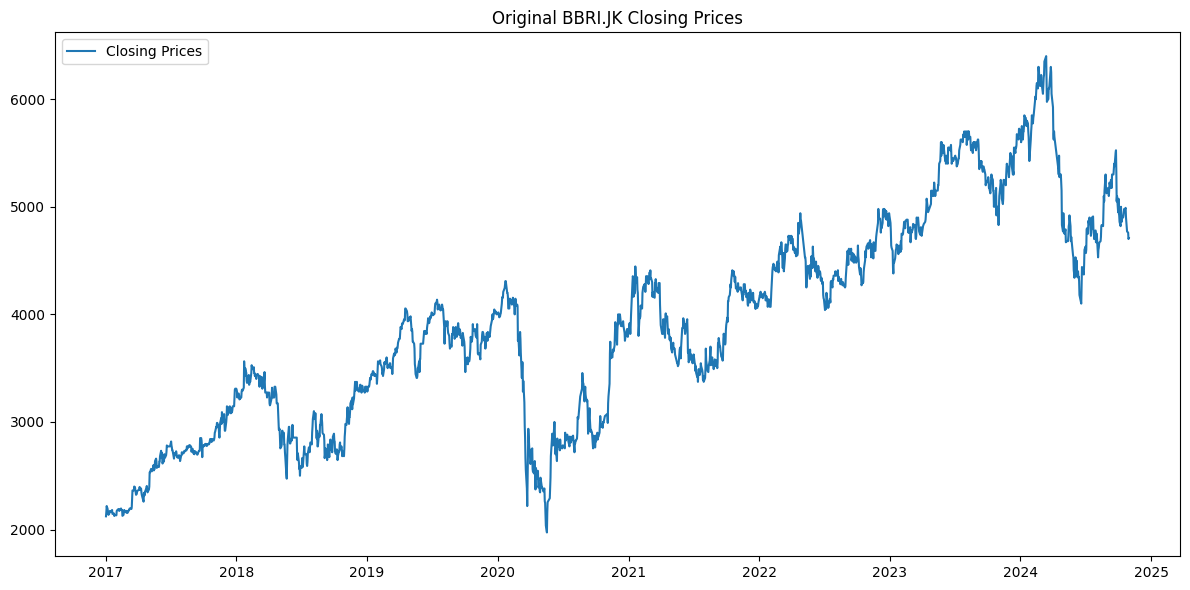

In [133]:
#Plot Original Series
plt.figure(figsize=(12, 6))
plt.plot(closing_prices, label='Closing Prices')
plt.title('Original BBRI.JK Closing Prices')
plt.legend()
plt.tight_layout()
plt.show()

In [134]:
closing_prices.head()

Ticker,BBRI.JK
Date,
2017-01-02 00:00:00+00:00,2122.690674
2017-01-03 00:00:00+00:00,2163.598877
2017-01-04 00:00:00+00:00,2218.143555
2017-01-05 00:00:00+00:00,2199.961914
2017-01-06 00:00:00+00:00,2199.961914


In [135]:
closing_prices_series = closing_prices['BBRI.JK']
type(closing_prices_series)

pandas.core.series.Series

Summary Statistics:
 Ticker      BBRI.JK
count   1944.000000
mean    3875.821213
std      968.385326
min     1972.693237
25%     3022.675049
50%     3845.388184
75%     4580.000000
max     6400.000000
Skewness of the Series: Ticker
BBRI.JK    0.23737
dtype: float64

Augmented Dickey-Fuller Test Results:
 {'ADF Statistic': -1.9264705504965831, 'p-value': 0.31971280374902145, 'Critical Values': {'1%': -3.4337252441664483, '5%': -2.8630309758314314, '10%': -2.56756373605059}}
The p-value is greater than 0.05, suggesting the series is non-stationary.


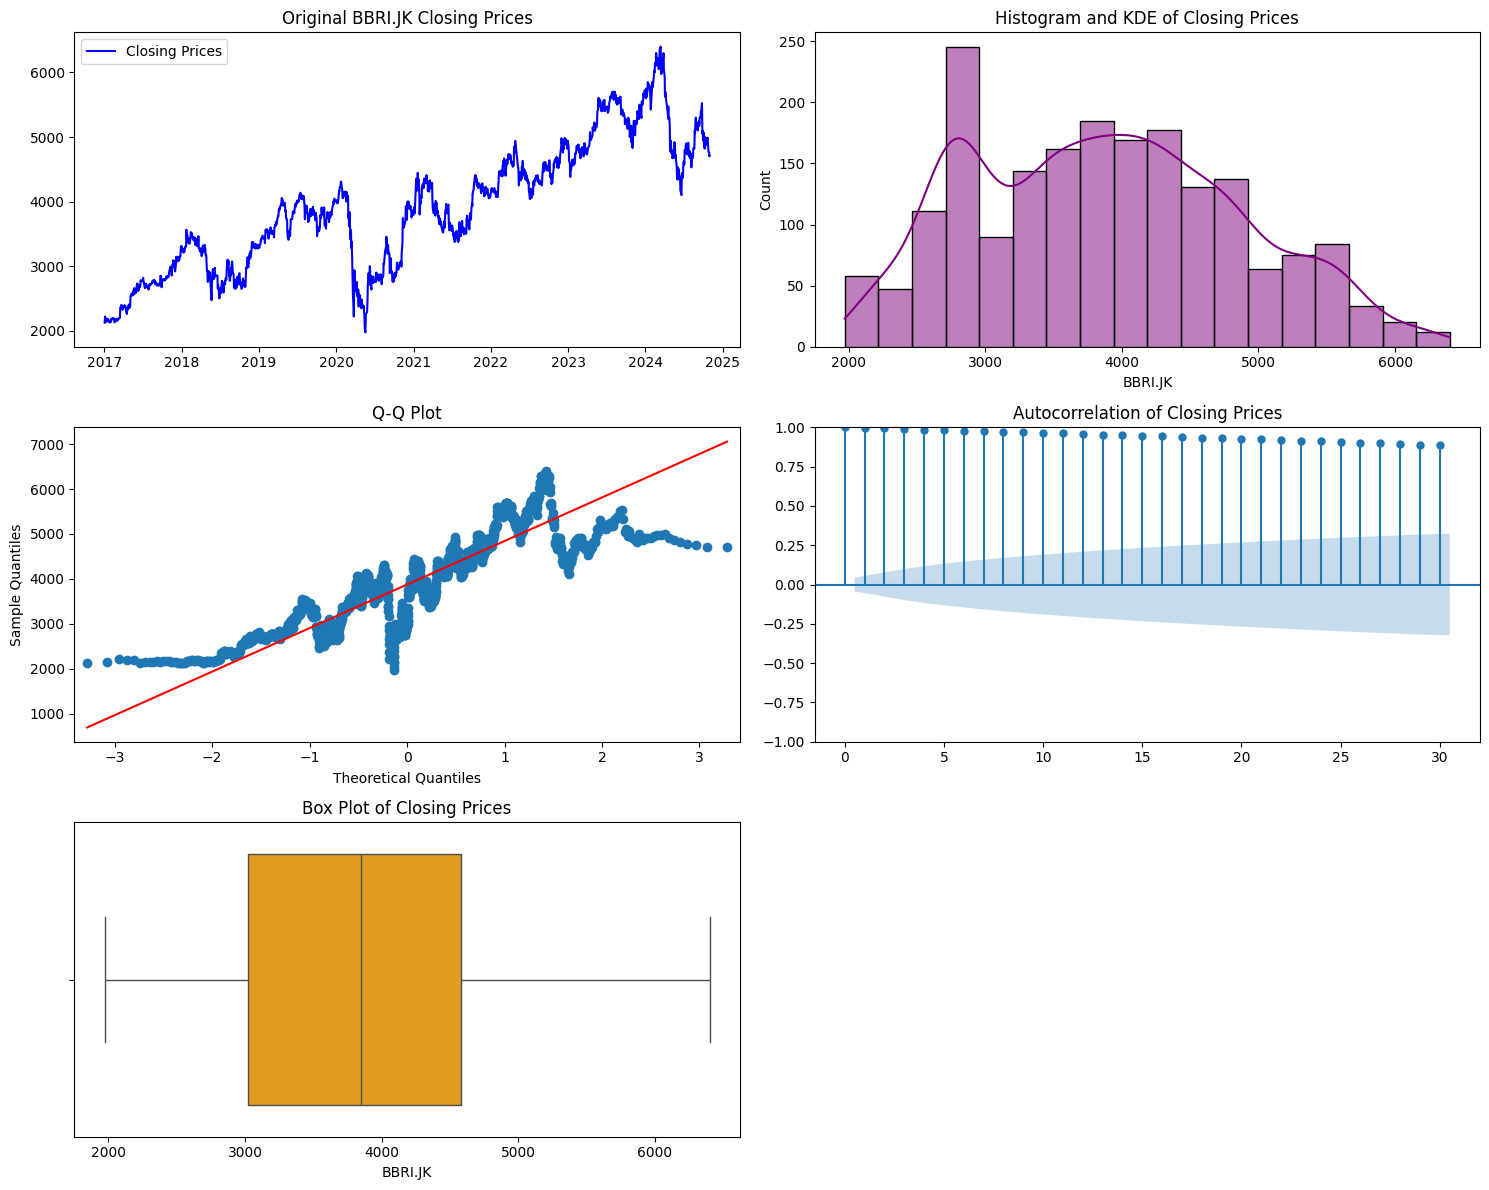

In [136]:

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.gofplots import qqplot

# Ensure closing_prices is a 1D pandas Series
closing_prices_series = closing_prices['BBRI.JK']

# Summary Statistics
summary_stats = closing_prices.describe()
print("Summary Statistics:\n", summary_stats)

# Plotting the Original Series
plt.figure(figsize=(15, 12))

# Original Time Series
plt.subplot(3, 2, 1)
plt.plot(closing_prices, label='Closing Prices', color='blue')
plt.title('Original BBRI.JK Closing Prices')
plt.legend()

# Histogram of the Series
plt.subplot(3, 2, 2)
sns.histplot(closing_prices_series, kde=True, color='purple')
plt.title('Histogram and KDE of Closing Prices')

# Q-Q Plot
plt.subplot(3, 2, 3)
qqplot(closing_prices, line='s', ax=plt.gca())
plt.title('Q-Q Plot')

# Skewness
skewness = closing_prices.skew()
print(f"Skewness of the Series: {skewness}")

# Autocorrelation Plot
plt.subplot(3, 2, 4)
plot_acf(closing_prices, ax=plt.gca(), lags=30)
plt.title('Autocorrelation of Closing Prices')

# Augmented Dickey-Fuller Test
adf_test = adfuller(closing_prices.dropna())
adf_result = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4],
}
print("\nAugmented Dickey-Fuller Test Results:\n", adf_result)

# Check Stationarity
if adf_test[1] > 0.05:
    print("The p-value is greater than 0.05, suggesting the series is non-stationary.")
else:
    print("The p-value is less than 0.05, suggesting the series is stationary.")

# Box Plot of the Series
plt.subplot(3, 2, 5)
sns.boxplot(x=closing_prices_series, color='orange')
plt.title('Box Plot of Closing Prices')

# Final Layout Adjustments
plt.tight_layout()
plt.show()



## Step 1.b.



In this step, we will perform the same analysis like in Step 1.a for transformed version of the time series. For the transformed version, we will transform the time series in log time series of the return. Upon completing the transforming the time series into log time series of the return, we perform statistical analysis to capture the mean, standard deviation, skewness and kurtosis of the transformed time series.

In [137]:
# Log Returns Transformation for Stationarity
log_returns = np.log(closing_prices / closing_prices.shift(1)).dropna()


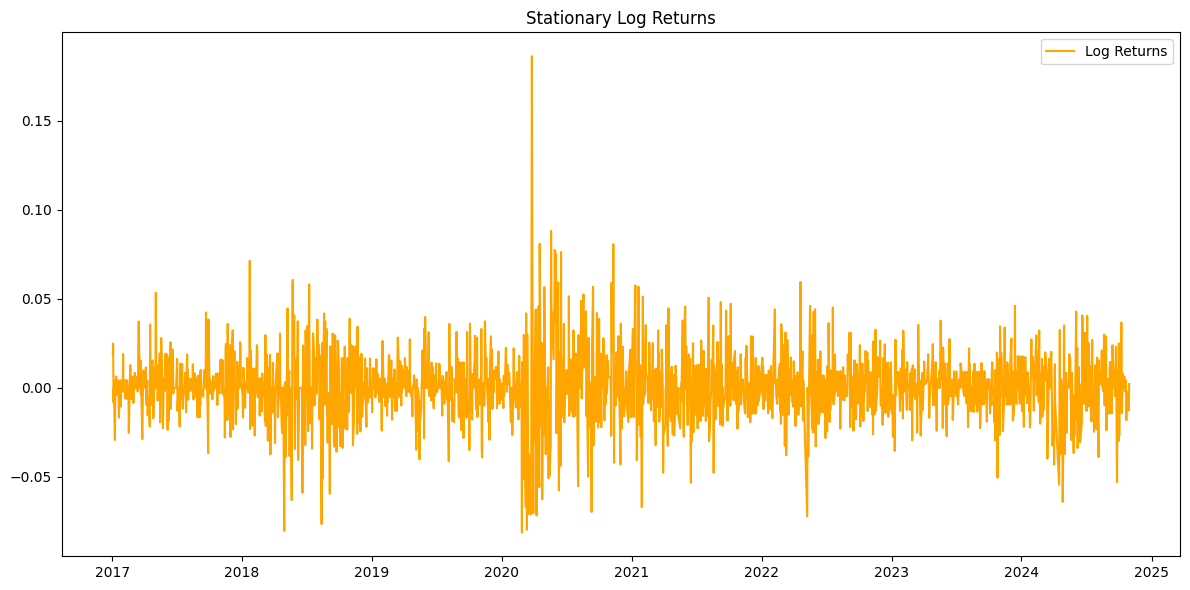

In [138]:
# Plot Transformed Series
plt.figure(figsize=(12, 6))


plt.plot(log_returns, color='orange', label='Log Returns')
plt.title('Stationary Log Returns')
plt.legend()

plt.tight_layout()
plt.show()

In [139]:
# Summary statistics
mean = np.mean(log_returns)
std_dev = log_returns.std(axis=0)
skewness = skew(log_returns)
kurt = kurtosis(log_returns)

print("Summary Statistics for Log Returns:")
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")



Summary Statistics for Log Returns:
Mean: 0.000410192196763688
Standard Deviation: Ticker
BBRI.JK    0.019475
dtype: float64
Skewness: [0.38336876]
Kurtosis: [6.66562738]


Based on the above statistic summary, the average return for BBRI.JK during the period that we evaluate is around 0.41% which is very close to zero, indicating that the return is osciliating around that mean with a standard deviation of 1.95% and the return is slighly positively skew with high kurtosis (leptokurtic) indicating there is a sharp peak with fat tails  

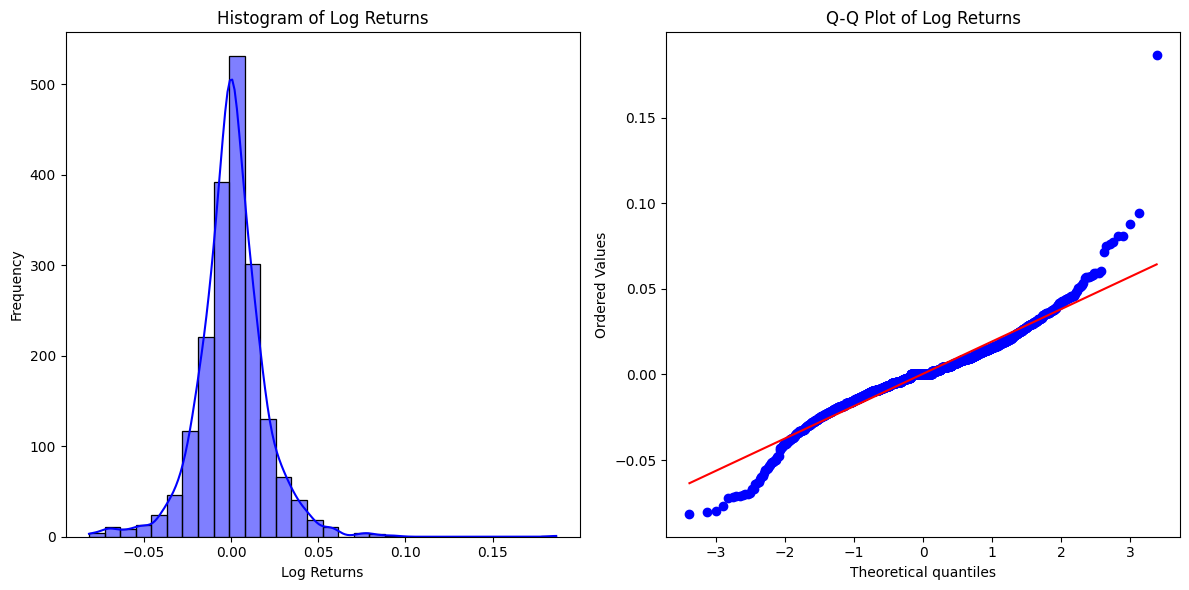

In [140]:
# Ensure log_returns is a Series for probplot compatibility
log_returns_series = log_returns.squeeze()  # Convert to Series if it's a DataFrame


# Q-Q plot for distribution analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(log_returns_series, kde=True, color='blue', bins=30)
plt.title("Histogram of Log Returns")
plt.xlabel("Log Returns")
plt.ylabel("Frequency")

# Q-Q plot
plt.subplot(1, 2, 2)
probplot(log_returns_series, dist="norm", plot=plt)
plt.title("Q-Q Plot of Log Returns")

plt.tight_layout()
plt.show()

The above histogram plotting and Q-Q plot visualize the statistical data above, confirming the positive skeweness distribution and there is an outlier. The outlier based on the log returns plots happened in 2020 in the COVID era.

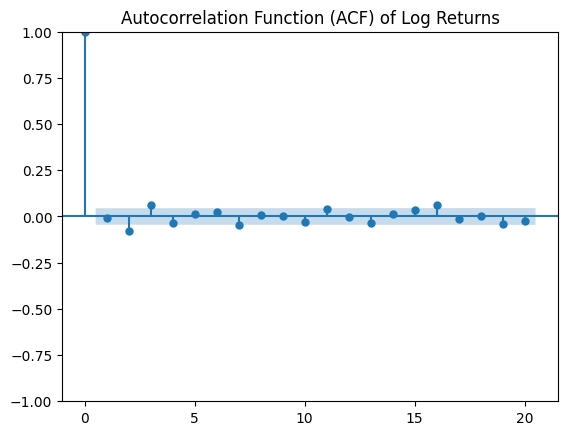

Ljung-Box Test for Autocorrelation (lags=10):
      lb_stat  lb_pvalue
10  29.844981   0.000908


In [141]:
# Autocorrelation plot to check for persistence
plot_acf(log_returns, lags=20)
plt.title("Autocorrelation Function (ACF) of Log Returns")
plt.show()

# Ljung-Box test for autocorrelation
ljung_box_result = acorr_ljungbox(log_returns, lags=[10], return_df=True)
print("Ljung-Box Test for Autocorrelation (lags=10):")
print(ljung_box_result)


The result of Ljung-Box Test Autocorrelation (lags=10) indicate that the time series are strongly autocorrelation in the time series up to 10 lags. The very low p-value enable us to reject the Null Hypothesis.

In practice, we could use the past returns to make a prediction for future returns in a short periods.

In [142]:
# ADF Test for Stationarity
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(log_returns)
print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print(f"Lags used: {adf_test[2]}")
print(f"Number of observations: {adf_test[3]}")



Augmented Dickey-Fuller Test Results:
ADF Statistic: -22.754612828522077
p-value: 0.0
Lags used: 3
Number of observations: 1939


Based on the ADF test result, the log return time series show that the dataset is stationary.

## Step 1.c.


Fractional differencing :
In this Section we will we are going to perform fractional differencing on the BBRI closing price data to obtain a new version of time series data that will be stationary but will also retains relevant information about the data.

In [143]:
# Making a Copy of Dataframe for furthur analysis
df_fd = closing_prices.copy()

In [144]:
df_fd['BBRI.JK']

,BBRI.JK
Date,
2017-01-02 00:00:00+00:00,2122.690674
2017-01-03 00:00:00+00:00,2163.598877
2017-01-04 00:00:00+00:00,2218.143555
2017-01-05 00:00:00+00:00,2199.961914
2017-01-06 00:00:00+00:00,2199.961914
...,...
2024-10-24 00:00:00+00:00,4820.000000
2024-10-25 00:00:00+00:00,4770.000000
2024-10-28 00:00:00+00:00,4760.000000


Here, we have done an adftest to check stationarity of the closing price data and we have found that we cannont reject the null hypthesis of non-stationarity.

In [145]:
#adftest
adftest=adfuller(df_fd['BBRI.JK'])
print('ADF Statistic: %f' % adftest[0])
print('ADF p-value: %f' % adftest[1])

ADF Statistic: -1.926471
ADF p-value: 0.319713


Now let's see what is traditional **Traditional differencing**, in this we will find the Stock return as well as log returns and will see how it works.

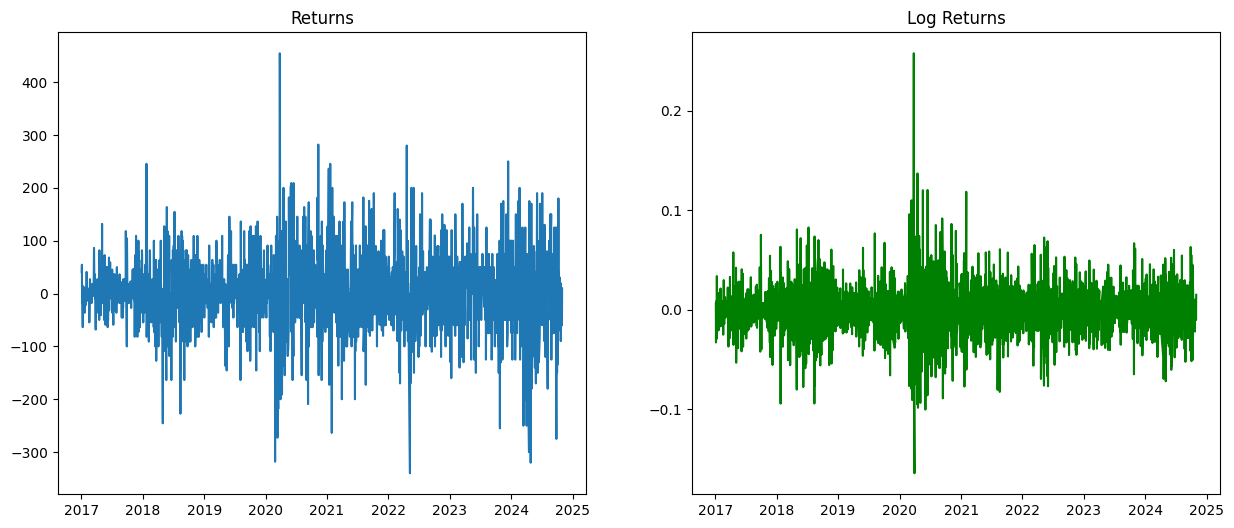

In [146]:
df_fd['Returns']=df_fd['BBRI.JK']-df_fd['BBRI.JK'].shift(1)
df_fd['Log_Returns']=log_returns-log_returns.shift(1)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(df_fd['Returns'])
plt.title('Returns')
plt.subplot(1,2,2)
plt.plot(df_fd['Log_Returns'],'g-')
plt.title('Log Returns')
plt.show()

Checking using the Adftest we can see both the time series are now stationary.

In [147]:
adftest_ret=adfuller(df_fd['Returns'].dropna())
print('Returns ADF Statistic: %f' % adftest_ret[0])
print('Returns ADF p-value: %f' % adftest_ret[1])
adftest_lret=adfuller(df_fd['Log_Returns'].dropna())
print('Log-Returns ADF Statistic: %f' % adftest_lret[0])
print('Log-Returns ADF p-value: %f' % adftest_lret[1])

Returns ADF Statistic: -25.321029
Returns ADF p-value: 0.000000
Log-Returns ADF Statistic: -15.366071
Log-Returns ADF p-value: 0.000000


We are now focusing on the primary topic of this section: fractional differencing. When calculating fractional differencing, the series required to compute a single data point extends infinitely. Therefore, our first step is to determine the weights associated with all preceding observations. After that, we will establish a cutoff threshold to truncate the number of weights we retain. Typically, this cutoff is set very low, around 10^-4, to preserve as much mathematical memory as possible. Let's start by visualizing how these weights behave as we vary the differencing order, which we will refer to as ***d***.

In [148]:
def getWeights(d,lags):
    # return the weights from the series expansion of the differencing operator
    # for real orders d and up to lags coefficients
    w=[1]
    for k in range(1,lags):
        w.append(-w[-1]*((d-k+1))/k)
    w=np.array(w).reshape(-1,1)
    return w

def plotWeights(dRange, lags, numberPlots):
    weights=pd.DataFrame(np.zeros((lags, numberPlots)))
    interval=np.linspace(dRange[0],dRange[1],numberPlots)
    for i, diff_order in enumerate(interval):
        weights[i]=getWeights(diff_order,lags)
    weights.columns = [round(x,2) for x in interval]
    fig=weights.plot(figsize=(15,6))
    plt.legend(title='Order of differencing')
    plt.title('Lag coefficients for various orders of differencing')
    plt.xlabel('lag coefficients')
    #plt.grid(False)
    plt.show()

def ts_differencing(series, order, lag_cutoff):
    # return the time series resulting from (fractional) differencing
    # for real orders order up to lag_cutoff coefficients

    weights=getWeights(order, lag_cutoff)
    res=0
    for k in range(lag_cutoff):
        res += weights[k]*series.shift(k).fillna(0)
    return res[lag_cutoff:]

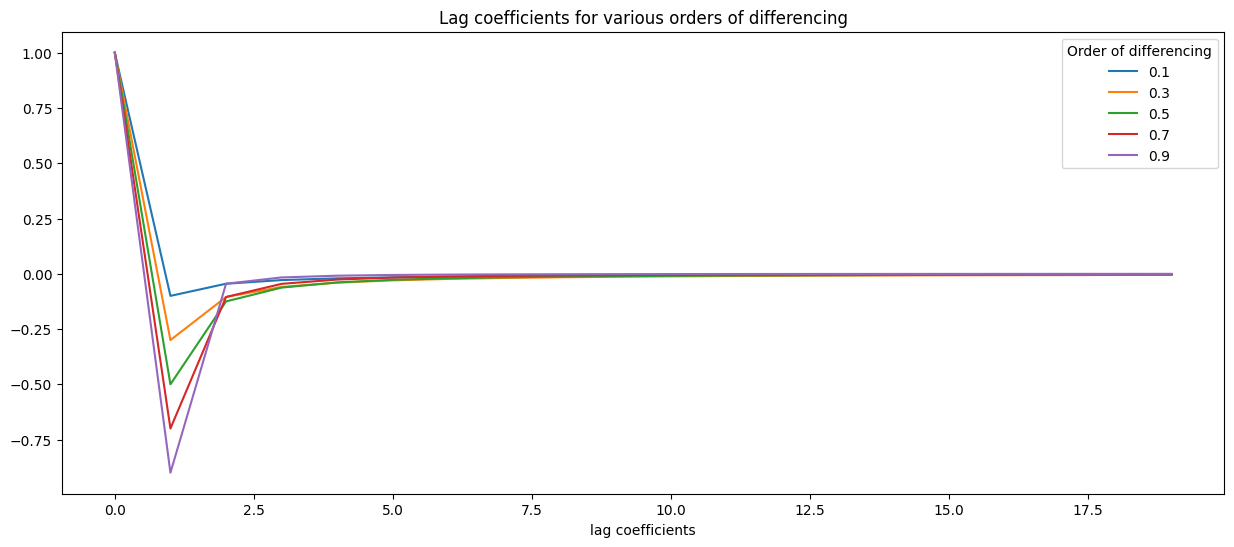

In [149]:
plotWeights([0.1,0.9],20,5)

In the plot above, we observe that our differencing order is fractional, and each lag has an associated weight. These weights converge to zero in absolute value, so we need to decide on a cutoff value for the absolute value of these coefficients to ensure our series is not theoretically infinite. For larger time series, we can afford to use smaller cutoff values to preserve more memory, but this involves a trade-off between memory conservation and computational efficiency. For shorter time series, it is advisable to avoid very low threshold values, as they can significantly reduce the size of your training set.

now we will try different differencing to be used so that we can find which the optimal cutoff and amount of lags neded to reach a certain cutoff with any given coefficient.

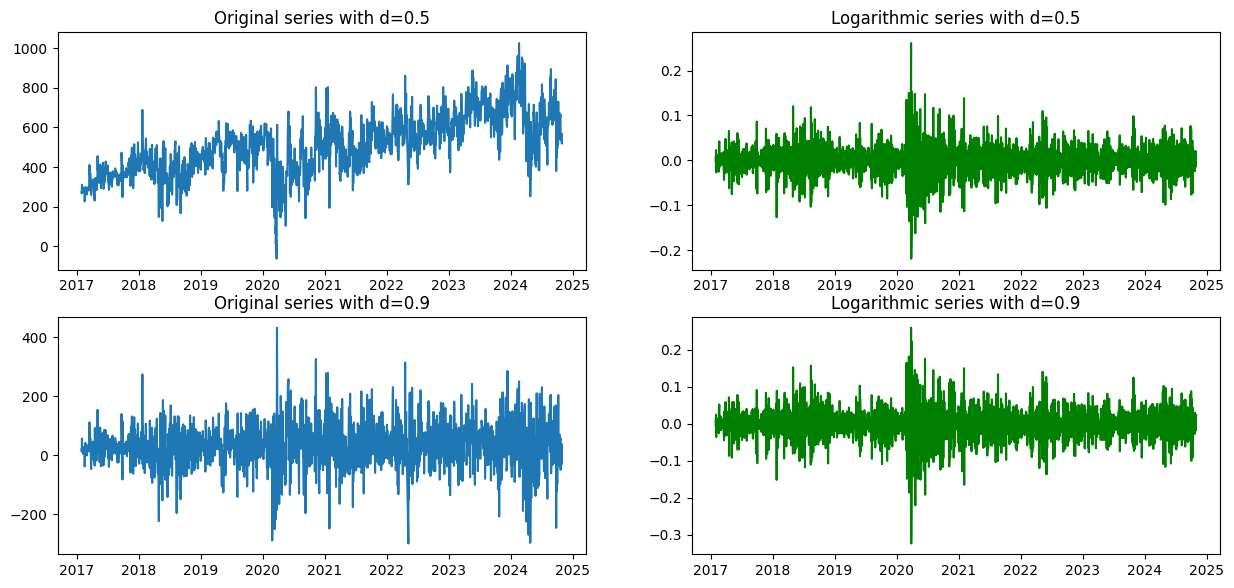

In [150]:
differences=[0.5,0.9]
fig, axs = plt.subplots(len(differences),2,figsize=(15,6))
for i in range(0,len(differences)):
    axs[i,0].plot(ts_differencing(df_fd['BBRI.JK'],differences[i],20))
    axs[i,0].set_title('Original series with d='+str(differences[i]))
    axs[i,1].plot(ts_differencing(df_fd['Log_Returns'],differences[i],20),'g-')
    axs[i,1].set_title('Logarithmic series with d='+str(differences[i]))
    plt.subplots_adjust(bottom=0.01) #increasing space between plots for aestethics

In [151]:
def cutoff_find(order,cutoff,start_lags): #order is our dearest d, cutoff is 1e-5 for us, and start lags is an initial amount of lags in which the loop will start, this can be set to high values in order to speed up the algo
    val=np.inf
    lags=start_lags
    while abs(val)>cutoff:
        w=getWeights(order, lags)
        val=w[len(w)-1]
        lags+=1
    return lags

In [152]:
def ts_differencing_tau(series, order, tau):
    # return the time series resulting from (fractional) differencing
    lag_cutoff=(cutoff_find(order,tau,1)) #finding lag cutoff with tau
    weights=getWeights(order, lag_cutoff)
    res=0
    for k in range(lag_cutoff):
        res += weights[k]*series.shift(k).fillna(0)
    return res[lag_cutoff:]

In [153]:
possible_d=np.divide(range(1,100),100)
tau=1e-4
original_adf_stat_holder=[None]*len(possible_d)
log_adf_stat_holder=[None]*len(possible_d)

for i in range(len(possible_d)):
    original_adf_stat_holder[i]=adfuller(ts_differencing_tau(df_fd['BBRI.JK'],possible_d[i],tau))[1]
    log_adf_stat_holder[i]=adfuller(ts_differencing_tau(df_fd['Log_Returns'],possible_d[i],tau))[1]

Text(0.5, 1.0, 'ADF P-value by differencing order in the logarithmic series')

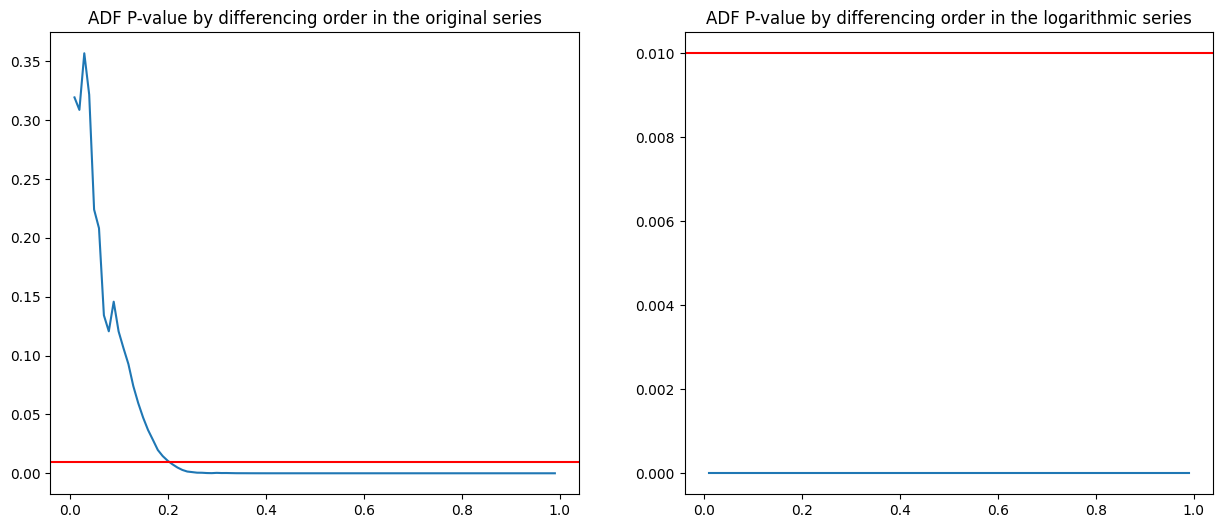

In [154]:
#now the plots of the ADF p-values
fig, axs = plt.subplots(1,2,figsize=(15,6))
axs[0].plot(possible_d,original_adf_stat_holder)
axs[0].axhline(y=0.01,color='r')
axs[0].set_title('ADF P-value by differencing order in the original series')
axs[1].plot(possible_d,log_adf_stat_holder)
axs[1].axhline(y=0.01,color='r')
axs[1].set_title('ADF P-value by differencing order in the logarithmic series')

In the above image, we can observe that achieving stationarity does not necessarily require full differencing. Utilizing fractionally differenced variables as either dependent variables or features in time series modeling can often enhance predictive performance. This approach allows the time series to retain more historical memory while maintaining stationarity.

Now we will finally build our fractional differenced time series data the we are going to use for furthur analysis, for that we will use order_differencing of 0.7 and lag_cutoff of 20.

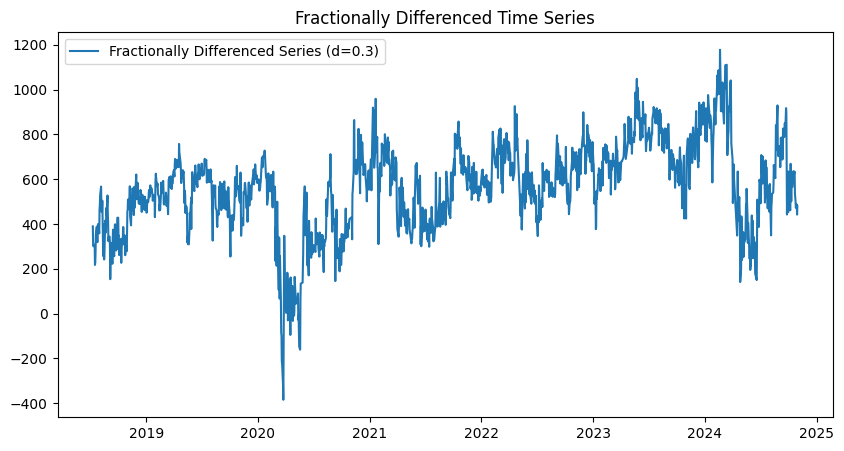

In [155]:
# Specify the fractional differencing order (e.g., 0.5 for half differencing)
differencing_order = 0.3
lag_cutoff = cutoff_find(differencing_order, tau, start_lags=1)  # Number of lags; can be chosen based on the plot of weights or cutoff_find function

# Generate the fractionally differenced series
df_fd['Fractional_Diff'] = ts_differencing(df_fd['BBRI.JK'], differencing_order, lag_cutoff).dropna()

# Visualize the fractionally differenced series
plt.figure(figsize=(10, 5))
plt.plot(df_fd['Fractional_Diff'], label=f'Fractionally Differenced Series (d={differencing_order})')
plt.title('Fractionally Differenced Time Series')
plt.legend()
plt.show()


In [156]:
# Summary statistics
fractional_diff_series = df_fd['Fractional_Diff'].dropna()
mean = np.mean(fractional_diff_series)
std_dev = fractional_diff_series.std(axis=0)
skewness = skew(fractional_diff_series)
kurt = kurtosis(fractional_diff_series)

print("Summary Statistics for Log Returns:")
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")


Summary Statistics for Log Returns:
Mean: 563.3403688759303
Standard Deviation: 195.95526890439922
Skewness: -0.4937077953830805
Kurtosis: 1.263174272580759


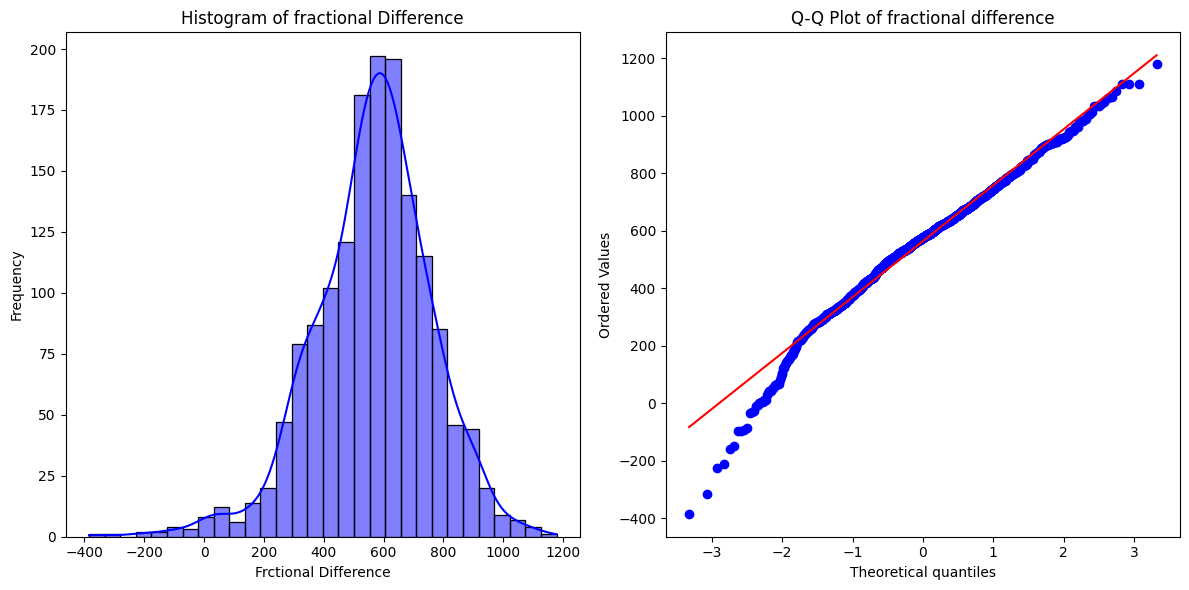

In [157]:

# Ensure log_returns is a Series for probplot compatibility
fractional_diff = fractional_diff_series.squeeze()  # Convert to Series if it's a DataFrame


# Q-Q plot for distribution analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(fractional_diff, kde=True, color='blue', bins=30)
plt.title("Histogram of fractional Difference")
plt.xlabel("Frctional Difference")
plt.ylabel("Frequency")

# Q-Q plot
plt.subplot(1, 2, 2)
probplot(fractional_diff, dist="norm", plot=plt)
plt.title("Q-Q Plot of fractional difference")

plt.tight_layout()
plt.show()


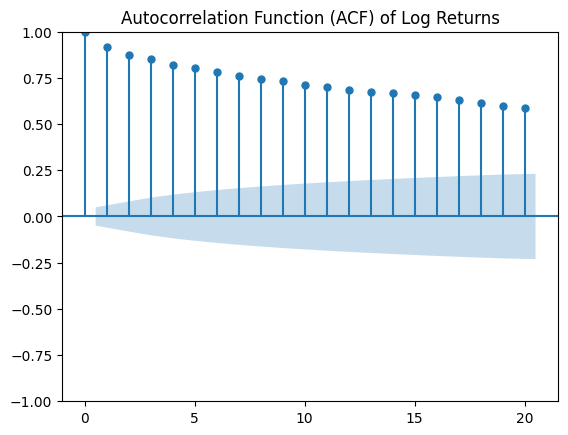

Ljung-Box Test for Autocorrelation (lags=10):
         lb_stat  lb_pvalue
10  10034.558188        0.0


In [158]:

# Autocorrelation plot to check for persistence
plot_acf(fractional_diff_series, lags=20)
plt.title("Autocorrelation Function (ACF) of Log Returns")
plt.show()

# Ljung-Box test for autocorrelation
ljung_box_result = acorr_ljungbox(fractional_diff_series, lags=[10], return_df=True)
print("Ljung-Box Test for Autocorrelation (lags=10):")
print(ljung_box_result)

In [159]:
adftest_ret=adfuller(df_fd['Fractional_Diff'].dropna())
print('Returns ADF Statistic: %f' % adftest_ret[0])
print('Returns ADF p-value: %f' % adftest_ret[1])

Returns ADF Statistic: -4.358435
Returns ADF p-value: 0.000351


Now we have our Fractionally differenced time series data and we have also done the adf test and the time series is stationary, so we can work on our next section.

## Step 2.a

In this step, we are going to build and train an MLP using the past information of the series as input. We note that this series is not stationary.

In [160]:
df_stock = yf.download('BBRI.JK', start='2017-01-01', end='2024-10-31')
closing_prices = df_stock['Close']

df_stock["Ret"] = closing_prices
df_stock.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [161]:
df_stock.tail()

Price,Date,Adj Close,Close,High,Low,Open,Volume,Ret
Ticker,,BBRI.JK,BBRI.JK,BBRI.JK,BBRI.JK,BBRI.JK,BBRI.JK,
1939,2024-10-24 00:00:00+00:00,4820.0,4820.0,4900.0,4810.0,4820.0,218162100,4820.0
1940,2024-10-25 00:00:00+00:00,4770.0,4770.0,4860.0,4770.0,4820.0,195647800,4770.0
1941,2024-10-28 00:00:00+00:00,4760.0,4760.0,4800.0,4710.0,4770.0,191211000,4760.0
1942,2024-10-29 00:00:00+00:00,4700.0,4700.0,4780.0,4700.0,4730.0,203658600,4700.0
1943,2024-10-30 00:00:00+00:00,4710.0,4710.0,4750.0,4630.0,4630.0,296314500,4710.0


Defining the Inputs into the MLP

In [162]:
name='Ret'
df_stock["Ret10_i"] = df_stock[name].rolling(10).mean()
df_stock["Ret25_i"] = df_stock[name].rolling(25).mean()
df_stock["Ret60_i"] = df_stock[name].rolling(60).mean()
df_stock["Ret90_i"] = df_stock[name].rolling(90).mean()
df_stock["Ret120_i"] = df_stock[name].rolling(120).mean()
df_stock["Ret240_i"] = df_stock[name].rolling(240).mean()

del df_stock["Open"]
del df_stock["Close"]
del df_stock["High"]
del df_stock["Low"]
del df_stock["Volume"]
del df_stock["Adj Close"]

df_stock = df_stock.dropna()
df_stock.tail(10)

Price,Date,Ret,Ret10_i,Ret25_i,Ret60_i,Ret90_i,Ret120_i,Ret240_i
Ticker,,,,,,,,
1934,2024-10-17 00:00:00+00:00,4980.0,4912.0,5096.2,4996.666667,4868.666667,4825.791667,5225.020833
1935,2024-10-18 00:00:00+00:00,4970.0,4923.0,5088.0,5001.166667,4875.666667,4823.041667,5224.270833
1936,2024-10-21 00:00:00+00:00,4990.0,4940.0,5075.6,5005.000000,4882.777778,4821.083333,5223.604167
1937,2024-10-22 00:00:00+00:00,4900.0,4930.0,5059.6,5007.000000,4889.333333,4819.000000,5223.187500
1938,2024-10-23 00:00:00+00:00,4860.0,4923.0,5040.0,5010.166667,4896.888889,4819.250000,5222.395833
1939,2024-10-24 00:00:00+00:00,4820.0,4919.0,5016.8,5012.666667,4904.888889,4819.666667,5221.645833
1940,2024-10-25 00:00:00+00:00,4770.0,4906.0,4992.6,5013.000000,4910.444444,4818.250000,5220.270833
1941,2024-10-28 00:00:00+00:00,4760.0,4892.0,4963.0,5013.833333,4914.000000,4818.250000,5218.541667
1942,2024-10-29 00:00:00+00:00,4700.0,4870.0,4930.0,5016.666667,4917.333333,4817.833333,5217.625000


Defining the Outputs

In [163]:
df_stock["Ret10"] = df_stock["Ret10_i"].shift(-10)
df_stock["Output"] = df_stock["Ret10"] > 0
df_stock["Output"] = df_stock["Output"].astype(int)
del df_stock["Ret10"]
df_stock = df_stock.dropna()
df_stock.tail(10)

Price,Date,Ret,Ret10_i,Ret25_i,Ret60_i,Ret90_i,Ret120_i,Ret240_i,Output
Ticker,,,,,,,,,
1934,2024-10-17 00:00:00+00:00,4980.0,4912.0,5096.2,4996.666667,4868.666667,4825.791667,5225.020833,0
1935,2024-10-18 00:00:00+00:00,4970.0,4923.0,5088.0,5001.166667,4875.666667,4823.041667,5224.270833,0
1936,2024-10-21 00:00:00+00:00,4990.0,4940.0,5075.6,5005.000000,4882.777778,4821.083333,5223.604167,0
1937,2024-10-22 00:00:00+00:00,4900.0,4930.0,5059.6,5007.000000,4889.333333,4819.000000,5223.187500,0
1938,2024-10-23 00:00:00+00:00,4860.0,4923.0,5040.0,5010.166667,4896.888889,4819.250000,5222.395833,0
1939,2024-10-24 00:00:00+00:00,4820.0,4919.0,5016.8,5012.666667,4904.888889,4819.666667,5221.645833,0
1940,2024-10-25 00:00:00+00:00,4770.0,4906.0,4992.6,5013.000000,4910.444444,4818.250000,5220.270833,0
1941,2024-10-28 00:00:00+00:00,4760.0,4892.0,4963.0,5013.833333,4914.000000,4818.250000,5218.541667,0
1942,2024-10-29 00:00:00+00:00,4700.0,4870.0,4930.0,5016.666667,4917.333333,4817.833333,5217.625000,0


In [164]:
df_stock.describe()

Price,Ret,Ret10_i,Ret25_i,Ret60_i,Ret90_i,Ret120_i,Ret240_i,Output
Ticker,,,,,,,,
count,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000
mean,4057.402187,4052.817031,4044.424406,4021.647771,4002.814103,3985.295089,3893.977243,0.994135
std,888.868523,884.749136,878.090447,859.484640,846.353557,837.718273,802.899364,0.076381
min,1972.693237,2209.052783,2346.504932,2550.258984,2637.934231,2754.497880,2582.720535,0.000000
25%,3409.031982,3409.941138,3380.305254,3345.093730,3288.933081,3230.550267,3198.997771,1.000000
50%,4009.021729,4003.567212,3998.476357,3924.629179,3869.630111,3839.327620,3728.458324,1.000000
75%,4670.000000,4669.000000,4656.800000,4634.333333,4648.222222,4577.583333,4506.458333,1.000000
max,6400.000000,6197.500000,6174.000000,5946.666667,5789.444444,5627.375000,5521.458333,1.000000


In [165]:
ts = int(0.2 * len(df_stock))  # Number of observations in the test sample
split_time = len(df_stock) - ts  # From this data we are in the test sample
test_time = df_stock.iloc[split_time:, 0:1].values  # Keep the test sample dates
Ret_vector = df_stock.iloc[split_time:, 1:2].values
df_stock.tail()

Price,Date,Ret,Ret10_i,Ret25_i,Ret60_i,Ret90_i,Ret120_i,Ret240_i,Output
Ticker,,,,,,,,,
1939,2024-10-24 00:00:00+00:00,4820.0,4919.0,5016.8,5012.666667,4904.888889,4819.666667,5221.645833,0
1940,2024-10-25 00:00:00+00:00,4770.0,4906.0,4992.6,5013.000000,4910.444444,4818.250000,5220.270833,0
1941,2024-10-28 00:00:00+00:00,4760.0,4892.0,4963.0,5013.833333,4914.000000,4818.250000,5218.541667,0
1942,2024-10-29 00:00:00+00:00,4700.0,4870.0,4930.0,5016.666667,4917.333333,4817.833333,5217.625000,0
1943,2024-10-30 00:00:00+00:00,4710.0,4846.0,4905.4,5018.500000,4921.000000,4817.166667,5216.416667,0


In [166]:
from sklearn.model_selection import train_test_split

Xdf, ydf = df_stock.iloc[:, 2:-1], df_stock.iloc[:, -1]
X = Xdf.values.astype("float32")
y = ydf.values.astype("float32")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=ts, shuffle=False
)  # It is important to keep "shuffle=False"
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1364, 6) (341, 6) (1364,) (341,)


In [167]:
import tensorflow as tf

tf.keras.backend.clear_session()  # We clear the backend to reset the random seed process
tf.random.set_seed(
    1234
)  # We will set a random seed so that results obtained are somewhat replicable

act_fun = "relu"
hp_units = 25
hp_units_2 = 15
hp_units_3 = 10
n_dropout = 0.2

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=hp_units, activation=act_fun))
model.add(tf.keras.layers.Dropout(n_dropout))
model.add(tf.keras.layers.Dense(units=hp_units_2, activation=act_fun))
model.add(tf.keras.layers.Dropout(n_dropout))
model.add(tf.keras.layers.Dense(units=hp_units_3, activation=act_fun))
model.add(tf.keras.layers.Dropout(n_dropout))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

hp_lr = 1e-5  # Learning rate

adam = tf.keras.optimizers.Adam(learning_rate=hp_lr)  # Adam optimizer

model.compile(optimizer=adam, loss="binary_crossentropy", metrics=["accuracy"])

In [168]:
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    patience=20,
    restore_best_weights=True,
)

In [169]:
class_weight = {0: (np.mean(y_train) / 0.5) * 1.2, 1: 1.0}
print(class_weight)

{0: 2.4, 1: 1.0}


In [170]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    verbose=2,
    callbacks=[es],
    class_weight=class_weight,
)

Epoch 1/500
35/35 - 6s - 161ms/step - accuracy: 0.3813 - loss: 386.6845 - val_accuracy: 0.0000e+00 - val_loss: 441.4947
Epoch 2/500
35/35 - 1s - 39ms/step - accuracy: 0.4216 - loss: 344.4983 - val_accuracy: 0.0000e+00 - val_loss: 416.0881
Epoch 3/500
35/35 - 0s - 4ms/step - accuracy: 0.4005 - loss: 367.6746 - val_accuracy: 0.0000e+00 - val_loss: 389.4802
Epoch 4/500
35/35 - 0s - 3ms/step - accuracy: 0.4042 - loss: 358.9122 - val_accuracy: 0.0000e+00 - val_loss: 362.8618
Epoch 5/500
35/35 - 0s - 3ms/step - accuracy: 0.4308 - loss: 333.2185 - val_accuracy: 0.0000e+00 - val_loss: 338.2295
Epoch 6/500
35/35 - 0s - 4ms/step - accuracy: 0.4180 - loss: 340.5110 - val_accuracy: 0.0000e+00 - val_loss: 312.9970
Epoch 7/500
35/35 - 0s - 3ms/step - accuracy: 0.4225 - loss: 322.3208 - val_accuracy: 0.0000e+00 - val_loss: 288.5328
Epoch 8/500
35/35 - 0s - 4ms/step - accuracy: 0.4372 - loss: 303.9807 - val_accuracy: 0.0000e+00 - val_loss: 263.5804
Epoch 9/500
35/35 - 0s - 3ms/step - accuracy: 0.4400 

In [171]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 25)                  │             175 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,210 (8.64 KB)

 Trainable params: 736 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,474 (5.76 KB)

In [172]:
from sklearn import metrics

y_prob = model.predict(X_test)
y_pred = np.where(y_prob > 0.50, 1, 0)

acc = model.evaluate(X_test, y_test)
print("Model accuracy in test: ", acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9951 - loss: 0.6458
Model accuracy in test:  [3.868163585662842, 0.9706745147705078]


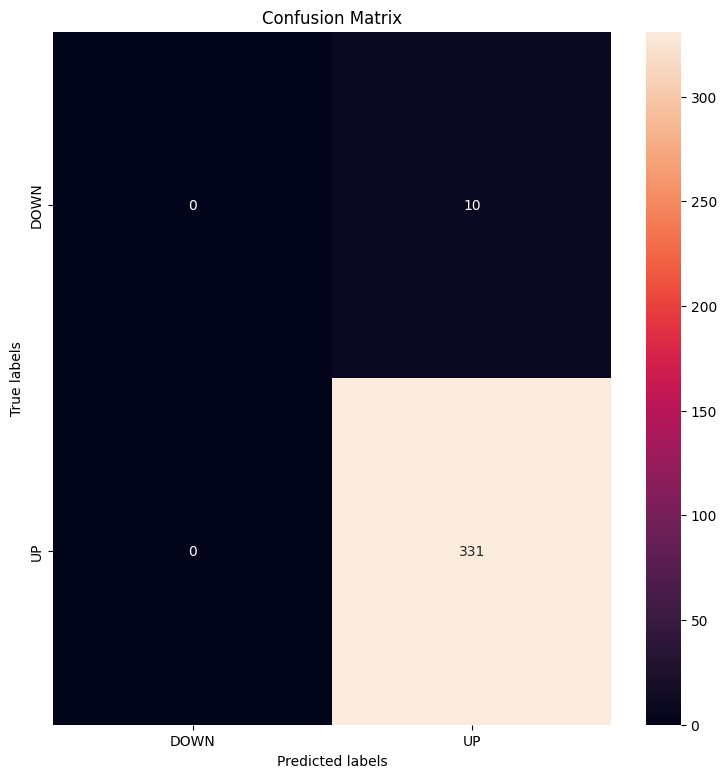

In [173]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 9))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt="g", ax=ax)
# annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["DOWN", "UP"])
ax.yaxis.set_ticklabels(["DOWN", "UP"]);

The model accuraccy here is about 99 percent which is quite high

## Step 2.b



MLP model on stationary time series

On this task, we will rework all the task from Step 2.A. by using past informaiton of the stationary time series as inputs. We then build and train the MLP model.

Using the Module 1 from Deep Learning, we convert the Python code from that Lesson 1 to Lesson 4 and using for this project by converting the necessary data into log return. In Step 1.B., we have demonstrated that such log returns time series comprehend with stationary. Therefore, in this MLP model, we will directly use the log returns as stationary time series.

In [174]:
df = yf.download('BBRI.JK', start='2017-01-01', end='2024-10-31')
closing_prices = df['Adj Close']

df["Ret"] = np.log(closing_prices / closing_prices.shift(1)).dropna()

df.tail()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,Ret
Ticker,BBRI.JK,BBRI.JK,BBRI.JK,BBRI.JK,BBRI.JK,BBRI.JK,
Date,,,,,,,
2024-10-24 00:00:00+00:00,4820.0,4820.0,4900.0,4810.0,4820.0,218162100,-0.008265
2024-10-25 00:00:00+00:00,4770.0,4770.0,4860.0,4770.0,4820.0,195647800,-0.010428
2024-10-28 00:00:00+00:00,4760.0,4760.0,4800.0,4710.0,4770.0,191211000,-0.002099
2024-10-29 00:00:00+00:00,4700.0,4700.0,4780.0,4700.0,4730.0,203658600,-0.012685
2024-10-30 00:00:00+00:00,4710.0,4710.0,4750.0,4630.0,4630.0,296314500,0.002125


In [175]:
df["Ret10_i"] = np.log(closing_prices / closing_prices.shift(10)).dropna()
df["Ret25_i"] = np.log(closing_prices / closing_prices.shift(25)).dropna()
df["Ret60_i"] = np.log(closing_prices / closing_prices.shift(60)).dropna()
df["Ret90_i"] = np.log(closing_prices / closing_prices.shift(90)).dropna()
df["Ret120_i"] = np.log(closing_prices / closing_prices.shift(120)).dropna()
df["Ret240_i"] = np.log(closing_prices / closing_prices.shift(240)).dropna()

del df["Open"]
del df["Close"]
del df["High"]
del df["Low"]
del df["Volume"]
del df["Adj Close"]

df = df.dropna()
df.tail(10)

Price,Ret,Ret10_i,Ret25_i,Ret60_i,Ret90_i,Ret120_i,Ret240_i
Ticker,,,,,,,
Date,,,,,,,
2024-10-17 00:00:00+00:00,0.006042,0.012121,-0.038409,0.040989,0.123825,-0.062277,-0.000607
2024-10-18 00:00:00+00:00,-0.002010,0.022381,-0.040419,0.055857,0.135545,-0.064287,0.016614
2024-10-21 00:00:00+00:00,0.004016,0.034662,-0.060271,0.047188,0.137260,-0.046019,0.020630
2024-10-22 00:00:00+00:00,-0.018201,-0.020203,-0.078472,0.024795,0.128297,-0.049762,0.031988
2024-10-23 00:00:00+00:00,-0.008197,-0.014301,-0.096058,0.039879,0.150727,0.006192,0.013841
2024-10-24 00:00:00+00:00,-0.008265,-0.008265,-0.113625,0.031615,0.161787,0.010428,0.015527
2024-10-25 00:00:00+00:00,-0.010428,-0.026889,-0.119412,0.004202,0.110732,-0.035019,-0.014703
2024-10-28 00:00:00+00:00,-0.002099,-0.028988,-0.144500,0.010560,0.069593,0.000000,-0.031401


In [176]:
df["Ret10"] = df["Ret10_i"].shift(-10)
df["Output"] = df["Ret10"] > 0
df["Output"] = df["Output"].astype(int)
del df["Ret10"]
df = df.dropna()
df.tail(10)



Price,Ret,Ret10_i,Ret25_i,Ret60_i,Ret90_i,Ret120_i,Ret240_i,Output
Ticker,,,,,,,,
Date,,,,,,,,
2024-10-17 00:00:00+00:00,0.006042,0.012121,-0.038409,0.040989,0.123825,-0.062277,-0.000607,0
2024-10-18 00:00:00+00:00,-0.002010,0.022381,-0.040419,0.055857,0.135545,-0.064287,0.016614,0
2024-10-21 00:00:00+00:00,0.004016,0.034662,-0.060271,0.047188,0.137260,-0.046019,0.020630,0
2024-10-22 00:00:00+00:00,-0.018201,-0.020203,-0.078472,0.024795,0.128297,-0.049762,0.031988,0
2024-10-23 00:00:00+00:00,-0.008197,-0.014301,-0.096058,0.039879,0.150727,0.006192,0.013841,0
2024-10-24 00:00:00+00:00,-0.008265,-0.008265,-0.113625,0.031615,0.161787,0.010428,0.015527,0
2024-10-25 00:00:00+00:00,-0.010428,-0.026889,-0.119412,0.004202,0.110732,-0.035019,-0.014703,0
2024-10-28 00:00:00+00:00,-0.002099,-0.028988,-0.144500,0.010560,0.069593,0.000000,-0.031401,0


In [177]:
df.describe()


Price,Ret,Ret10_i,Ret25_i,Ret60_i,Ret90_i,Ret120_i,Ret240_i,Output
Ticker,,,,,,,,
count,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000
mean,0.000404,0.004381,0.011292,0.029253,0.043767,0.057595,0.137203,0.527582
std,0.020126,0.061607,0.096564,0.148309,0.167126,0.177463,0.196182,0.499385
min,-0.080520,-0.471539,-0.551338,-0.668609,-0.668609,-0.626840,-0.597992,0.000000
25%,-0.009552,-0.025049,-0.037393,-0.037543,-0.050153,-0.050118,0.027494,0.000000
50%,0.000000,0.005972,0.023013,0.050244,0.078230,0.078653,0.155678,1.000000
75%,0.009913,0.037075,0.068579,0.126295,0.156466,0.182598,0.276596,1.000000
max,0.186412,0.359895,0.333835,0.483734,0.437830,0.601517,0.638397,1.000000


In [178]:
ts = int(0.2 * len(df))  # Number of observations in the test sample
split_time = len(df) - ts  # From this data we are in the test sample
test_time = df.iloc[split_time:, 0:1].values  # Keep the test sample dates
Ret_vector = df.iloc[split_time:, 1:2].values
df.tail()



Price,Ret,Ret10_i,Ret25_i,Ret60_i,Ret90_i,Ret120_i,Ret240_i,Output
Ticker,,,,,,,,
Date,,,,,,,,
2024-10-24 00:00:00+00:00,-0.008265,-0.008265,-0.113625,0.031615,0.161787,0.010428,0.015527,0
2024-10-25 00:00:00+00:00,-0.010428,-0.026889,-0.119412,0.004202,0.110732,-0.035019,-0.014703,0
2024-10-28 00:00:00+00:00,-0.002099,-0.028988,-0.144500,0.010560,0.069593,0.000000,-0.031401,0
2024-10-29 00:00:00+00:00,-0.012685,-0.045746,-0.161721,0.036841,0.065958,-0.010582,0.006445,0
2024-10-30 00:00:00+00:00,0.002125,-0.049700,-0.122725,0.023632,0.072639,-0.016843,-0.007559,0


In [179]:
from sklearn.model_selection import train_test_split


# Assuming df is your DataFrame and the last column is the target
Xdf = df.iloc[:, 2:-1]  # Feature columns (adjust as necessary)
ydf = df.iloc[:, -1]     # Target column (binary output)

# Convert to NumPy arrays and split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    Xdf.values.astype('float32'),  # Ensure features are float32
    ydf.values.astype('float32'),   # Ensure labels are float32
    test_size=ts,  # Number of observations for test set
    shuffle=False  # Important to keep time order
)

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (1364, 5)
y_train shape: (1364,)


For modelling, we are using Activation Function “RELU” for all the 3 hidden layers where hidden layers 1 will have 25 neuron, hidden layer 2 have 15 neurons and hidden layer 3 have 10 neuron. For this model, we are using dropout 20%. For output layer, another activation function is being use instead of RELU, that is Sigmoid activation. For learning rate, we use 0.00001 with Adam as optimizer and binary cross entropy being use as loss function in this model.

In [180]:
import tensorflow as tf

tf.keras.backend.clear_session()  # We clear the backend to reset the random seed process
tf.random.set_seed(
    1234
)  # We will set a random seed so that results obtained are somewhat replicable

act_fun = "relu"
hp_units = 25
hp_units_2 = 15
hp_units_3 = 10
n_dropout = 0.2

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=hp_units, activation=act_fun))
model.add(tf.keras.layers.Dropout(n_dropout))
model.add(tf.keras.layers.Dense(units=hp_units_2, activation=act_fun))
model.add(tf.keras.layers.Dropout(n_dropout))
model.add(tf.keras.layers.Dense(units=hp_units_3, activation=act_fun))
model.add(tf.keras.layers.Dropout(n_dropout))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

hp_lr = 1e-5  # Learning rate

adam = tf.keras.optimizers.Adam(learning_rate=hp_lr)  # Adam optimizer

model.compile(optimizer=adam, loss="binary_crossentropy", metrics=["accuracy"])

In [181]:
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    patience=20,
    restore_best_weights=True,
)


In [182]:
class_weight = {0: (np.mean(y_train) / 0.5) * 1.2, 1: 1.0}
print(class_weight)


{0: 1.3055718898773192, 1: 1.0}


In [183]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    verbose=2,
    callbacks=[es],
    class_weight=class_weight,
)

Epoch 1/500
35/35 - 5s - 150ms/step - accuracy: 0.5390 - loss: 0.7993 - val_accuracy: 0.5604 - val_loss: 0.6933
Epoch 2/500
35/35 - 1s - 38ms/step - accuracy: 0.5380 - loss: 0.7975 - val_accuracy: 0.5604 - val_loss: 0.6933
Epoch 3/500
35/35 - 0s - 4ms/step - accuracy: 0.5481 - loss: 0.7964 - val_accuracy: 0.5604 - val_loss: 0.6933
Epoch 4/500
35/35 - 0s - 4ms/step - accuracy: 0.5316 - loss: 0.7993 - val_accuracy: 0.5604 - val_loss: 0.6934
Epoch 5/500
35/35 - 0s - 4ms/step - accuracy: 0.5417 - loss: 0.7972 - val_accuracy: 0.5604 - val_loss: 0.6934
Epoch 6/500
35/35 - 0s - 3ms/step - accuracy: 0.5362 - loss: 0.7975 - val_accuracy: 0.5604 - val_loss: 0.6934
Epoch 7/500
35/35 - 0s - 3ms/step - accuracy: 0.5435 - loss: 0.7968 - val_accuracy: 0.5604 - val_loss: 0.6934
Epoch 8/500
35/35 - 0s - 4ms/step - accuracy: 0.5399 - loss: 0.7953 - val_accuracy: 0.5604 - val_loss: 0.6934
Epoch 9/500
35/35 - 0s - 3ms/step - accuracy: 0.5417 - loss: 0.7963 - val_accuracy: 0.5604 - val_loss: 0.6934
Epoch 1

In [184]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 25)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,135 (8.34 KB)

 Trainable params: 711 (2.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,424 (5.57 KB)

In [185]:
from sklearn import metrics

y_prob = model.predict(X_test)
y_pred = np.where(y_prob > 0.50, 1, 0)

acc = model.evaluate(X_test, y_test)
print("Model accuracy in test: ", acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4650 - loss: 0.6974
Model accuracy in test:  [0.6963658928871155, 0.46176469326019287]


In terms of binary cross entropy loss, the model result 69% which basically could be further improved. Meanwhile, in terms of accuracy, the model can only predict 54%, which is close to probability of randomly flipping a coin. With such low accuracy, the model is not very helpful in making a prediction.

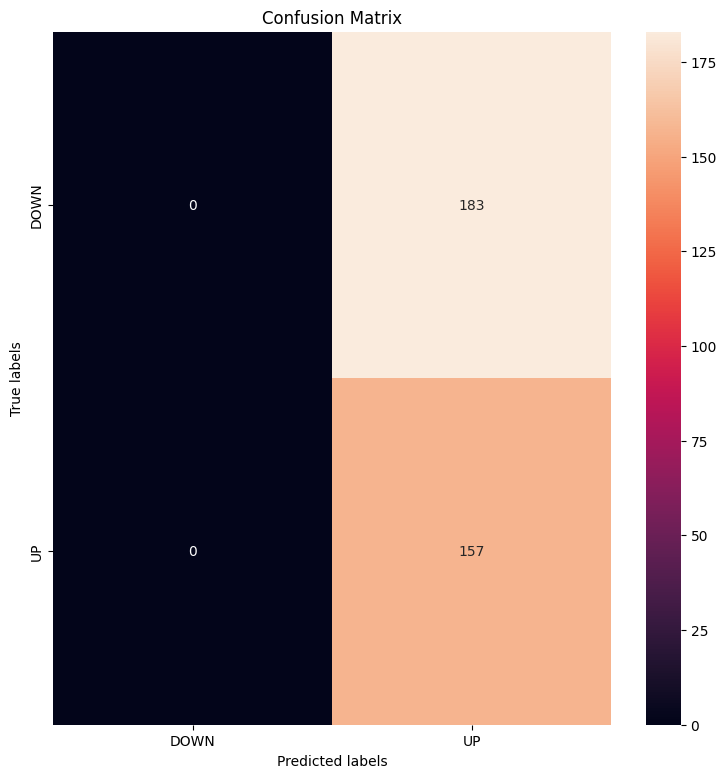

In [186]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 9))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt="g", ax=ax)
# annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["DOWN", "UP"])
ax.yaxis.set_ticklabels(["DOWN", "UP"]);

## Step 2.c.

As we have seen in Section Step 1.c. How we have calculated a fractionally differenced time series dataset, Now we will use the same data set as inputs to build and train an MLP which will try to predict the fractionally-differenced version of time series.

In [187]:
fd_prices = df_fd[['Fractional_Diff']].dropna()  # Convert to DataFrame and drop NaNs
fd_prices["Ret"] = fd_prices["Fractional_Diff"] / fd_prices["Fractional_Diff"].shift(1)
fd_prices = fd_prices.dropna()  # Drop rows with NaN after shift
fd_prices

Ticker,Fractional_Diff,Ret
Date,,
2018-07-11 00:00:00+00:00,312.192187,0.801385
2018-07-12 00:00:00+00:00,300.627426,0.962956
2018-07-13 00:00:00+00:00,306.136459,1.018325
2018-07-16 00:00:00+00:00,307.573389,1.004694
2018-07-17 00:00:00+00:00,217.333025,0.706605
...,...,...
2024-10-24 00:00:00+00:00,501.951551,0.961959
2024-10-25 00:00:00+00:00,472.752291,0.941829
2024-10-28 00:00:00+00:00,487.492490,1.031180


In [188]:
fd_prices["Ret10_i"] = fd_prices["Fractional_Diff"] / fd_prices["Fractional_Diff"].shift(10).dropna()
fd_prices["Ret25_i"] = fd_prices["Fractional_Diff"] / fd_prices["Fractional_Diff"].shift(25).dropna()
fd_prices["Ret60_i"] = fd_prices["Fractional_Diff"] / fd_prices["Fractional_Diff"].shift(60).dropna()
fd_prices["Ret90_i"] = fd_prices["Fractional_Diff"] / fd_prices["Fractional_Diff"].shift(90).dropna()
fd_prices["Ret120_i"] = fd_prices["Fractional_Diff"] / fd_prices["Fractional_Diff"].shift(120).dropna()
fd_prices["Ret240_i"] = fd_prices["Fractional_Diff"] / fd_prices["Fractional_Diff"].shift(240).dropna()

del fd_prices["Fractional_Diff"]

fd_prices = fd_prices.dropna()
fd_prices.tail(10)

Ticker,Ret,Ret10_i,Ret25_i,Ret60_i,Ret90_i,Ret120_i,Ret240_i
Date,,,,,,,
2024-10-17 00:00:00+00:00,1.034753,1.251363,0.924508,1.180001,1.861186,1.268490,0.947097
2024-10-18 00:00:00+00:00,0.966771,1.305086,0.878061,1.308233,2.160545,1.180651,1.064673
2024-10-21 00:00:00+00:00,1.031294,1.373065,0.767290,1.134953,1.985809,1.375324,1.041028
2024-10-22 00:00:00+00:00,0.847401,0.803270,0.681686,0.939843,1.859153,1.277367,1.142249
2024-10-23 00:00:00+00:00,0.971211,0.932990,0.633374,1.144796,2.908675,3.702132,0.912421
2024-10-24 00:00:00+00:00,0.961959,1.001006,0.590484,1.029591,3.350115,2.538797,0.952209
2024-10-25 00:00:00+00:00,0.941829,0.834077,0.592099,0.816878,1.290788,1.089156,0.728163
2024-10-28 00:00:00+00:00,1.031180,0.862381,0.531233,0.935225,0.958201,2.031259,0.691199
2024-10-29 00:00:00+00:00,0.906963,0.752108,0.492026,1.265475,1.061938,1.513345,1.040330


In [189]:
fd_prices["Ret10"] = fd_prices["Ret10_i"].shift(-10)
fd_prices["Output"] = fd_prices["Ret10"] > 0
fd_prices["Output"] = fd_prices["Output"].astype(int)
del fd_prices["Ret10"]
fd_prices = fd_prices.dropna()
fd_prices.tail(10)

<ipython-input-189-ce1d36020b29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd_prices["Ret10"] = fd_prices["Ret10_i"].shift(-10)
<ipython-input-189-ce1d36020b29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd_prices["Output"] = fd_prices["Ret10"] > 0
<ipython-input-189-ce1d36020b29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

Ticker,Ret,Ret10_i,Ret25_i,Ret60_i,Ret90_i,Ret120_i,Ret240_i,Output
Date,,,,,,,,
2024-10-17 00:00:00+00:00,1.034753,1.251363,0.924508,1.180001,1.861186,1.268490,0.947097,0
2024-10-18 00:00:00+00:00,0.966771,1.305086,0.878061,1.308233,2.160545,1.180651,1.064673,0
2024-10-21 00:00:00+00:00,1.031294,1.373065,0.767290,1.134953,1.985809,1.375324,1.041028,0
2024-10-22 00:00:00+00:00,0.847401,0.803270,0.681686,0.939843,1.859153,1.277367,1.142249,0
2024-10-23 00:00:00+00:00,0.971211,0.932990,0.633374,1.144796,2.908675,3.702132,0.912421,0
2024-10-24 00:00:00+00:00,0.961959,1.001006,0.590484,1.029591,3.350115,2.538797,0.952209,0
2024-10-25 00:00:00+00:00,0.941829,0.834077,0.592099,0.816878,1.290788,1.089156,0.728163,0
2024-10-28 00:00:00+00:00,1.031180,0.862381,0.531233,0.935225,0.958201,2.031259,0.691199,0
2024-10-29 00:00:00+00:00,0.906963,0.752108,0.492026,1.265475,1.061938,1.513345,1.040330,0


In [190]:
fd_prices.describe()


Ticker,Ret,Ret10_i,Ret25_i,Ret60_i,Ret90_i,Ret120_i,Ret240_i,Output
count,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000
mean,0.942431,1.201481,0.590646,-1.421445,-2.521868,-1.117252,-1.572026,0.974105
std,3.312514,8.946336,17.074101,94.087570,139.398183,82.808388,104.426811,0.158882
min,-113.043443,-83.679011,-612.512962,-3404.800874,-5045.037598,-2993.675078,-3777.295817,0.000000
25%,0.918404,0.862861,0.828090,0.794801,0.736597,0.745382,0.829945,1.000000
50%,0.993321,0.993887,1.016903,1.034061,1.048268,1.013726,1.090011,1.000000
75%,1.085026,1.165701,1.222154,1.305485,1.357146,1.290119,1.390767,1.000000
max,15.898500,308.946237,51.899514,81.360832,164.146886,110.917344,143.375375,1.000000


Here we are defininf our ouput label i.e. O for Down and 1 for Up.

In [191]:
ts = int(0.2 * len(fd_prices))  # Number of observations in the test sample
split_time = len(fd_prices) - ts  # From this data we are in the test sample
test_time = fd_prices.iloc[split_time:, 0:1].values  # Keep the test sample dates
Ret_vector = fd_prices.iloc[split_time:, 1:2].values
fd_prices.tail()



Ticker,Ret,Ret10_i,Ret25_i,Ret60_i,Ret90_i,Ret120_i,Ret240_i,Output
Date,,,,,,,,
2024-10-24 00:00:00+00:00,0.961959,1.001006,0.590484,1.029591,3.350115,2.538797,0.952209,0
2024-10-25 00:00:00+00:00,0.941829,0.834077,0.592099,0.816878,1.290788,1.089156,0.728163,0
2024-10-28 00:00:00+00:00,1.031180,0.862381,0.531233,0.935225,0.958201,2.031259,0.691199,0
2024-10-29 00:00:00+00:00,0.906963,0.752108,0.492026,1.265475,1.061938,1.513345,1.040330,0
2024-10-30 00:00:00+00:00,1.083174,0.779284,0.712276,1.005540,1.217801,1.315496,0.834873,0


we will split our data into train and test split here.

In [192]:
from sklearn.model_selection import train_test_split


# Assuming df is your DataFrame and the last column is the target
Xdf = fd_prices.iloc[:, 2:-1]  # Feature columns (adjust as necessary)
ydf = fd_prices.iloc[:, -1]     # Target column (binary output)

# Convert to NumPy arrays and split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    Xdf.values.astype('float32'),  # Ensure features are float32
    ydf.values.astype('float32'),   # Ensure labels are float32
    test_size=ts,  # Number of observations for test set
    shuffle=False  # Important to keep time order
)

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (1051, 5)
y_train shape: (1051,)


Now we will build our tensorflow model.

In [193]:
import tensorflow as tf

tf.keras.backend.clear_session()  # We clear the backend to reset the random seed process
tf.random.set_seed(
    1234
)  # We will set a random seed so that results obtained are somewhat replicable

act_fun = "relu"
hp_units = 25
hp_units_2 = 15
hp_units_3 = 10
n_dropout = 0.2

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=hp_units, activation=act_fun))
model.add(tf.keras.layers.Dropout(n_dropout))
model.add(tf.keras.layers.Dense(units=hp_units_2, activation=act_fun))
model.add(tf.keras.layers.Dropout(n_dropout))
model.add(tf.keras.layers.Dense(units=hp_units_3, activation=act_fun))
model.add(tf.keras.layers.Dropout(n_dropout))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

hp_lr = 1e-5  # Learning rate

adam = tf.keras.optimizers.Adam(learning_rate=hp_lr)  # Adam optimizer

model.compile(optimizer=adam, loss="binary_crossentropy", metrics=["accuracy"])

In [194]:
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    patience=20,
    restore_best_weights=True,
)


In [195]:
class_weight = {0: (np.mean(y_train) / 0.5) * 1.2, 1: 1.0}
print(class_weight)


{0: 2.34519510269165, 1: 1.0}


Now we will fit our Data to the model to get the accuracy of the predection

In [196]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    verbose=2,
    callbacks=[es],
    class_weight=class_weight,
)

Epoch 1/500
27/27 - 5s - 195ms/step - accuracy: 0.8560 - loss: 0.6590 - val_accuracy: 1.0000 - val_loss: 0.6584
Epoch 2/500
27/27 - 1s - 48ms/step - accuracy: 0.8738 - loss: 0.8472 - val_accuracy: 1.0000 - val_loss: 0.6561
Epoch 3/500
27/27 - 0s - 3ms/step - accuracy: 0.8250 - loss: 0.9776 - val_accuracy: 1.0000 - val_loss: 0.6540
Epoch 4/500
27/27 - 0s - 6ms/step - accuracy: 0.8631 - loss: 1.5338 - val_accuracy: 1.0000 - val_loss: 0.6521
Epoch 5/500
27/27 - 0s - 4ms/step - accuracy: 0.8643 - loss: 0.6506 - val_accuracy: 1.0000 - val_loss: 0.6500
Epoch 6/500
27/27 - 0s - 3ms/step - accuracy: 0.8798 - loss: 1.3930 - val_accuracy: 1.0000 - val_loss: 0.6481
Epoch 7/500
27/27 - 0s - 4ms/step - accuracy: 0.8833 - loss: 0.6469 - val_accuracy: 1.0000 - val_loss: 0.6462
Epoch 8/500
27/27 - 0s - 4ms/step - accuracy: 0.8833 - loss: 0.6455 - val_accuracy: 1.0000 - val_loss: 0.6443
Epoch 9/500
27/27 - 0s - 5ms/step - accuracy: 0.8869 - loss: 1.6369 - val_accuracy: 1.0000 - val_loss: 0.6425
Epoch 1

This is our model summay, in this model we have used 3 hidden layer 25, 15, 10 units repectively, Each hidden layer uses the ReLU activation function and we have a dropout layers with a rate of 0.2. Our output layer is a single unit with a sigmoid activation function for our binary classification tasks. We are also using Adam optimizer with a learning rate of 1 X 10^-5 and Binary cross-entropy loss function.

In [197]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 25)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,135 (8.34 KB)

 Trainable params: 711 (2.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,424 (5.57 KB)

In [198]:
from sklearn import metrics

y_prob = model.predict(X_test)
y_pred = np.where(y_prob > 0.50, 1, 0)

acc = model.evaluate(X_test, y_test)
print("Model accuracy in test: ", acc)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9908 - loss: 0.6435
Model accuracy in test:  [0.6461219191551208, 0.9618320465087891]


using the acccuracy and confusion matrix we are obtaining the performance of model on how it performed. in the above output we can see 57.6% of binary cross entropy loss, and in terms of accuracy the model can only predict 96.1% which is a phenoenal result and we can conclude that the fractionally differenced data worked very well in our predecion task.

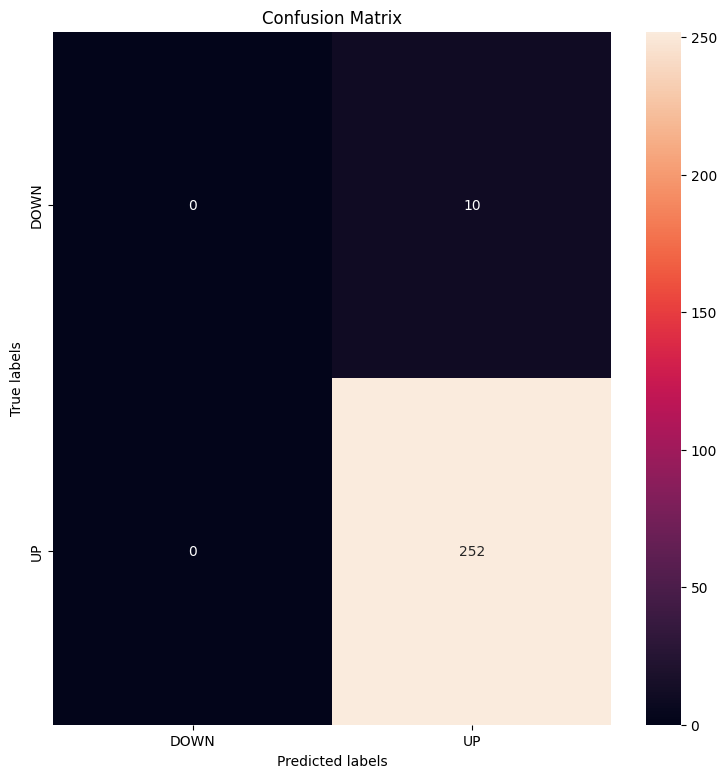

In [199]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 9))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt="g", ax=ax)
# annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["DOWN", "UP"])
ax.yaxis.set_ticklabels(["DOWN", "UP"]);

##Step 3.a.

Here we are going to look at the CNN for the original time series.

In [200]:
df.head()

Price,Ret,Ret10_i,Ret25_i,Ret60_i,Ret90_i,Ret120_i,Ret240_i,Output
Ticker,,,,,,,,
Date,,,,,,,,
2017-12-12 00:00:00+00:00,0.002903,0.020499,0.062801,0.138097,0.143101,0.123233,0.423371,1
2017-12-13 00:00:00+00:00,0.000000,0.044452,0.047487,0.138097,0.138097,0.123233,0.404283,1
2017-12-14 00:00:00+00:00,0.002894,0.074998,0.050381,0.140991,0.142657,0.126127,0.382280,1
2017-12-15 00:00:00+00:00,-0.020439,0.054559,0.032987,0.078201,0.122218,0.105688,0.370071,1
2017-12-18 00:00:00+00:00,0.000000,0.026908,0.039103,0.078201,0.117230,0.089428,0.370071,1


(1704,)


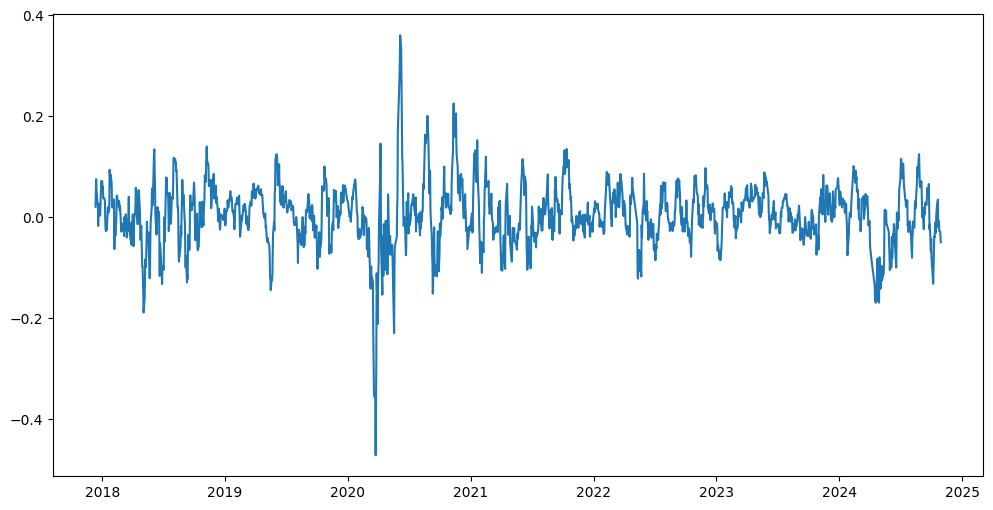

In [201]:
Xdf_1 = df.iloc[:, 1]
print(Xdf_1.shape)
plt.figure(figsize=(12, 6))
plt.plot(Xdf_1)

(1674, 30)


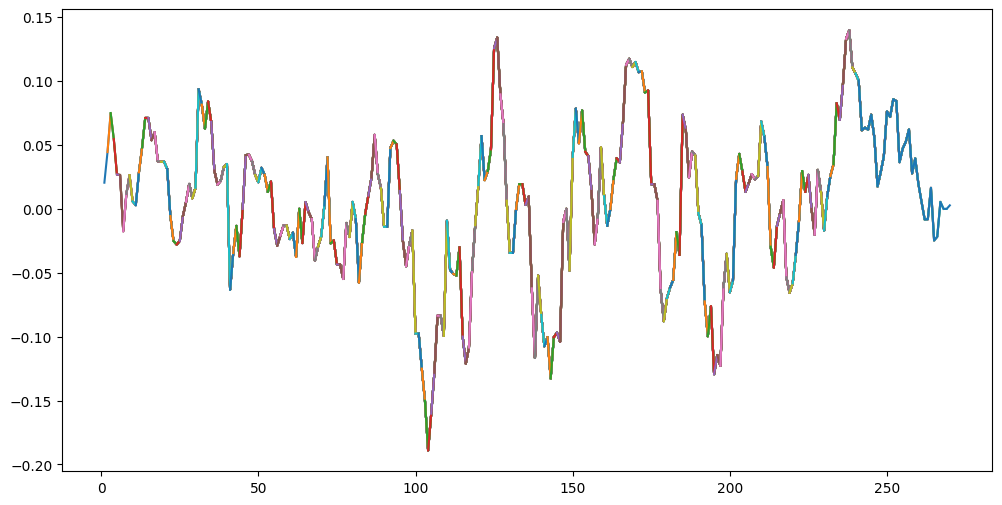

In [202]:
X_train = []
window_size = 30
for i in range(window_size, Xdf_1.shape[0]):
    X_train.append(Xdf_1[i - window_size : i])
X_train = np.array(X_train)
print(X_train.shape)
# Define a "window_size"-days interval
days = np.linspace(1, X_train.shape[0], num=X_train.shape[0])
# Plot the overlapping time series
plt.figure(figsize=(12, 6))
for i in range(241):
    plt.plot(days[i : window_size + i], X_train[i, :])

In [203]:
!pip install pyts

In [204]:
# Check for NaN or Inf in X_train
print(np.isnan(X_train).any())  # Check for NaN
print(np.isinf(X_train).any())  # Check for Inf


False
False


In [205]:
X_train.shape

(1674, 30)

In [206]:
from pyts.image import GramianAngularField

#X_train_mean = np.nanmean(X_train)
#X_train = np.nan_to_num(X_train, nan=X_train_mean)

transformer = GramianAngularField()
X_train_new = transformer.transform(X_train)
print(X_train_new.shape)

(1674, 30, 30)


(30, 30)


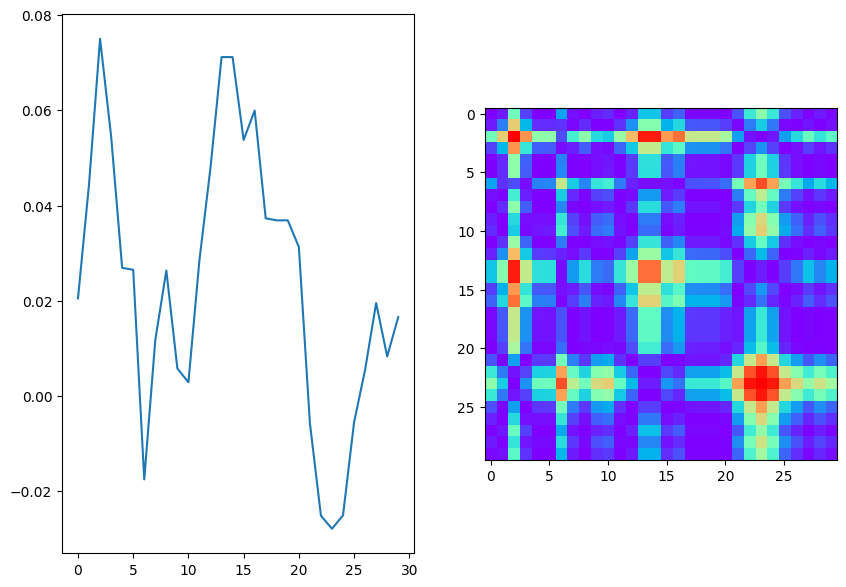

In [207]:
# Show the results for the first time series
fig, ax = plt.subplots(1, 2, figsize=(10, 7), gridspec_kw={"width_ratios": [1, 1]})
ax[0].plot(X_train[0, :])
ax[1].imshow(X_train_new[0], cmap="rainbow")
print(X_train_new[0].shape)

(30, 30)


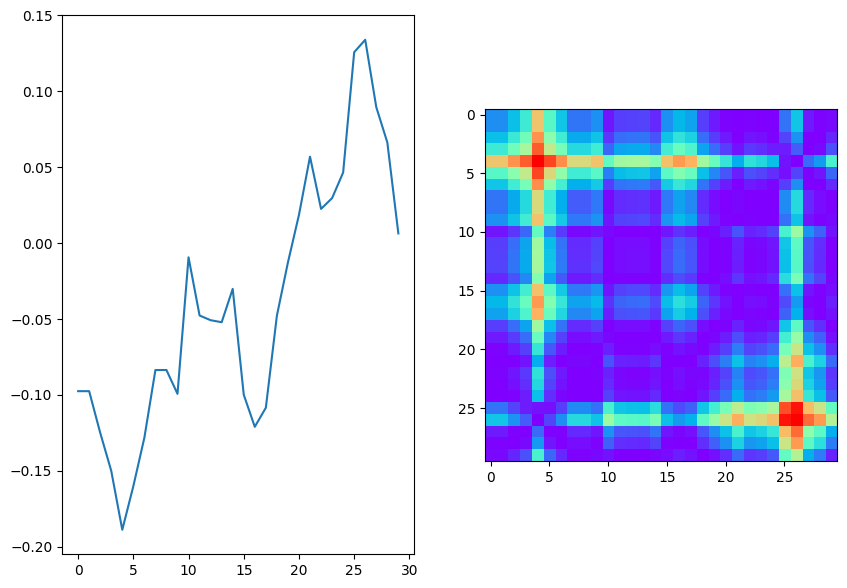

In [208]:
# Show the results for the 100th time series
fig, ax = plt.subplots(1, 2, figsize=(10, 7), gridspec_kw={"width_ratios": [1, 1]})
ax[0].plot(X_train[99, :])
ax[1].imshow(X_train_new[99], cmap="rainbow")
print(X_train_new[99].shape)

In [209]:
# Generate the labels: 1 if price goes up after window_size days, 0 otherwise
y_data = []
for i in range(window_size, Xdf_1.shape[0] - window_size):
    y_data.append(Xdf_1[i] < Xdf_1[i + window_size])
y_data = np.array(y_data)
y_data.shape


<ipython-input-209-136080f68540>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_data.append(Xdf_1[i] < Xdf_1[i + window_size])


(1644,)

In [210]:
# Determine the examples to be used as inputs in the model and rescale them to the [0,255] scale
X_data = X_train_new[:-window_size]
for i in range(X_data.shape[0]):
    X_data[i] = (X_data[i] - np.min(X_data[i])) / (
        np.max(X_data[i]) - np.min(X_data[i])
    )
# We could simply write X_data = (X_data + 1)/2
X_data = X_data * 255
X_data.shape

(1644, 30, 30)

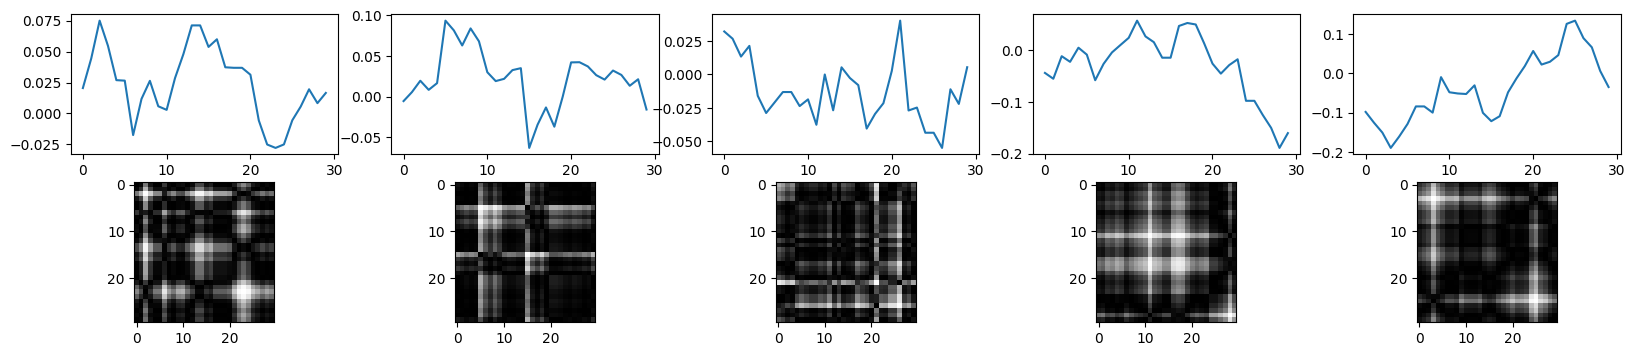

In [211]:
# display several time series and the corresponding images
fig, ax = plt.subplots(2, 5, figsize=(20, 4))
for i in range(0, 125, 25):
    ax[0, int(i / 25)].plot(X_train[i])
for i in range(0, 125, 25):
    ax[1, int(i / 25)].imshow(X_data[i], "gray")

In [212]:
# Split into train and test
train_split = 0.8
y_data_train = y_data[: int(train_split * y_data.shape[0])]
y_data_test = y_data[int(train_split * y_data.shape[0]) :]
X_data_train = X_data[: int(train_split * y_data.shape[0])]
X_data_test = X_data[int(train_split * y_data.shape[0]) :]

In [213]:
import tensorflow as tf
model = tf.keras.Sequential()
# Input layer
model.add(tf.keras.layers.InputLayer(input_shape=(30, 30, 1)))
model.add(tf.keras.layers.Conv2D(16, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(64, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5, seed=1234))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [214]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 287,489 (1.10 MB)

 Trainable params: 287,489 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [215]:
model.compile(loss="binary_crossentropy", optimizer="RMSprop", metrics=["accuracy"])
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "model.keras", monitor="val_accuracy", save_best_only=True, mode="auto"
)
class_weight = {0: 1 / (1 - np.mean(y_data_train)), 1: 1.0}
print(class_weight)

{0: 2.0546874999999996, 1: 1.0}


In [216]:
model.fit(
    x=X_data_train,
    y=y_data_train,
    epochs=50,
    validation_data=(X_data_test, y_data_test),
    verbose=1,
    callbacks=[checkpoint],
    class_weight=class_weight,
)

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.5107 - loss: 7.5918 - val_accuracy: 0.5410 - val_loss: 0.7007
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5052 - loss: 1.0349 - val_accuracy: 0.5228 - val_loss: 0.7333
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5533 - loss: 1.0211 - val_accuracy: 0.5046 - val_loss: 0.6999
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5398 - loss: 0.9906 - val_accuracy: 0.5258 - val_loss: 0.7580
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5373 - loss: 0.9668 - val_accuracy: 0.4924 - val_loss: 0.7447
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5844 - loss: 0.9147 - val_accuracy: 0.5289 - val_loss: 0.8106
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6366 - loss: 0.8772 - val_accuracy: 0.5805 - val_loss: 0.8319
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6471 - loss: 0.8520 - val_accuracy: 0.5289 - val_loss

In [217]:
model = tf.keras.models.load_model("model.keras")
acc = model.evaluate(x=X_data_test, y=y_data_test)
print("Accuracy over validation: {:.2f}%".format(acc[1] * 100))

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6177 - loss: 0.7520
Accuracy over validation: 58.05%


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
              precision    recall  f1-score   support

       False       0.60      0.60      0.60       174
        True       0.55      0.56      0.56       155

    accuracy                           0.58       329
   macro avg       0.58      0.58      0.58       329
weighted avg       0.58      0.58      0.58       329



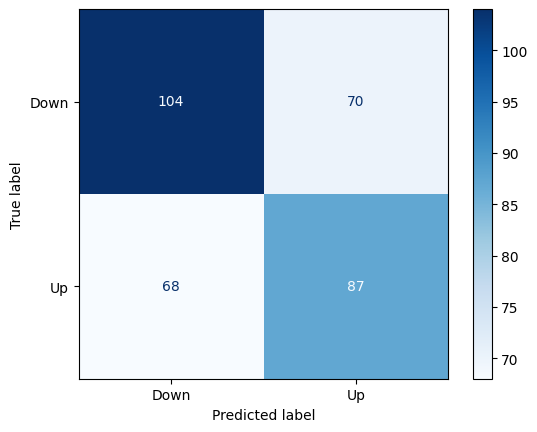

In [218]:
from sklearn import metrics
from sklearn.metrics import classification_report

y_prob = model.predict(X_data_test)
y_pred = np.round(y_prob)
cm = metrics.confusion_matrix(y_data_test, y_pred)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Down", "Up"])
cm.plot(values_format="", cmap="Blues")
print(classification_report(y_data_test, y_pred))

##Step 3.b.



CNN with GAF representation on stationary time series

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(1077,)


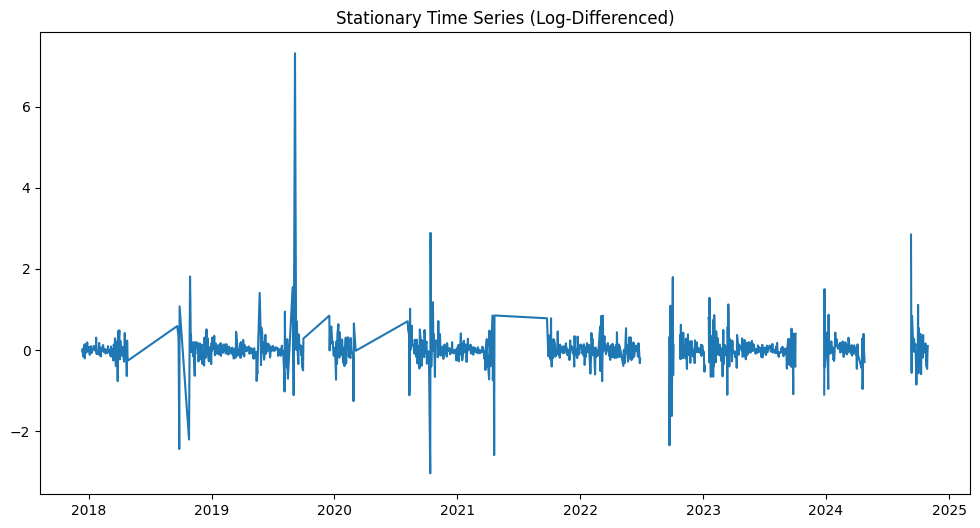

In [219]:
# Extract closing prices and apply log transformation
Xdf = np.log(df.iloc[:, 4])

# Difference the log-transformed series to make it stationary (log returns)
Xdf_diff = Xdf.diff().dropna()

# Print the shape of the transformed data
print(Xdf_diff.shape)

# Plot the log-differenced (stationary) time series
plt.figure(figsize=(12, 6))
plt.plot(Xdf_diff)
plt.title('Stationary Time Series (Log-Differenced)')
plt.show()


(1047, 30)


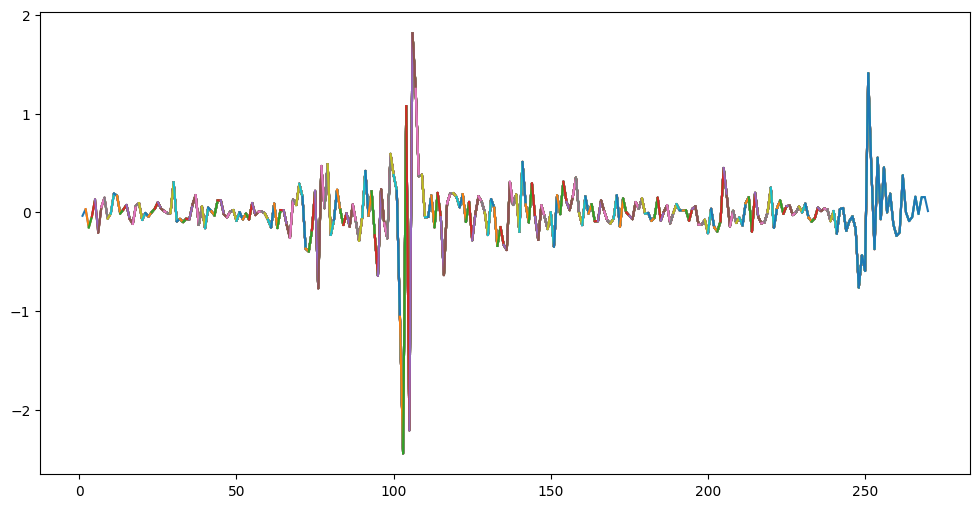

In [220]:
X_train = []
window_size = 30
for i in range(window_size, Xdf_diff.shape[0]):
    X_train.append(Xdf_diff[i - window_size : i])
X_train = np.array(X_train)
print(X_train.shape)
# Define a "window_size"-days interval
days = np.linspace(1, X_train.shape[0], num=X_train.shape[0])
# Plot the overlapping time series
plt.figure(figsize=(12, 6))
for i in range(241):
    plt.plot(days[i : window_size + i], X_train[i, :])

In [221]:
# Check for NaN or Inf in X_train
print(np.isnan(X_train).any())  # Check for NaN
print(np.isinf(X_train).any())  # Check for Inf


False
True


In [222]:
# Replace NaN and Inf with the mean of X_train
X_train_mean = np.nanmean(X_train[np.isfinite(X_train)])  # Mean of finite values
X_train = np.nan_to_num(X_train, nan=X_train_mean, posinf=X_train_mean, neginf=X_train_mean)


In [223]:
!pip install pyts

In [224]:
from pyts.image import GramianAngularField

#X_train_mean = np.nanmean(X_train)
#X_train = np.nan_to_num(X_train, nan=X_train_mean)

transformer = GramianAngularField()
X_train_new = transformer.transform(X_train)
print(X_train_new.shape)


(1047, 30, 30)


(30, 30)


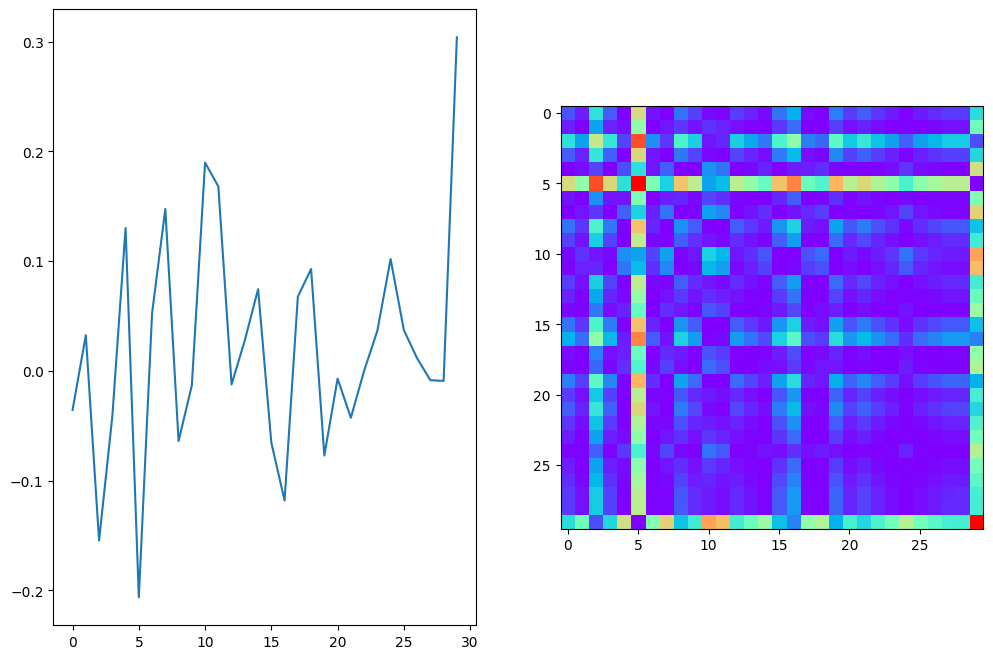

In [225]:
# Show the results for the first time series
fig, ax = plt.subplots(1, 2, figsize=(12, 8), gridspec_kw={"width_ratios": [1, 1]})
ax[0].plot(X_train[0, :])
ax[1].imshow(X_train_new[0], cmap="rainbow")
print(X_train_new[0].shape)


(30, 30)


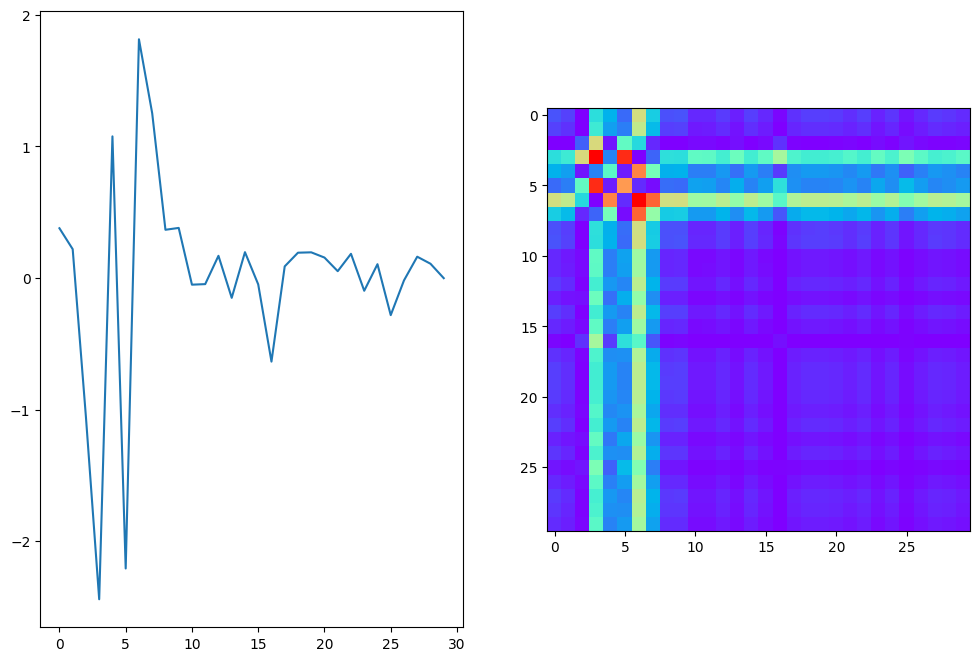

In [226]:
# Show the results for the 100th time series
fig, ax = plt.subplots(1, 2, figsize=(12, 8), gridspec_kw={"width_ratios": [1, 1]})
ax[0].plot(X_train[99, :])
ax[1].imshow(X_train_new[99], cmap="rainbow")
print(X_train_new[99].shape)

In [227]:
import tensorflow as tf

In [228]:
# Generate the labels: 1 if price goes up after window_size days, 0 otherwise
y_data = []
for i in range(window_size, Xdf_diff.shape[0] - window_size):
    y_data.append(Xdf_diff[i] < Xdf_diff[i + window_size])
y_data = np.array(y_data)
y_data.shape



<ipython-input-228-d44173df6f3a>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_data.append(Xdf_diff[i] < Xdf_diff[i + window_size])


(1017,)

In [229]:
# Determine the examples to be used as inputs in the model and rescale them to the [0,255] scale
X_data = X_train_new[:-window_size]
for i in range(X_data.shape[0]):
    X_data[i] = (X_data[i] - np.min(X_data[i])) / (
        np.max(X_data[i]) - np.min(X_data[i])
    )
# We could simply write X_data = (X_data + 1)/2
X_data = X_data * 255
X_data.shape

(1017, 30, 30)

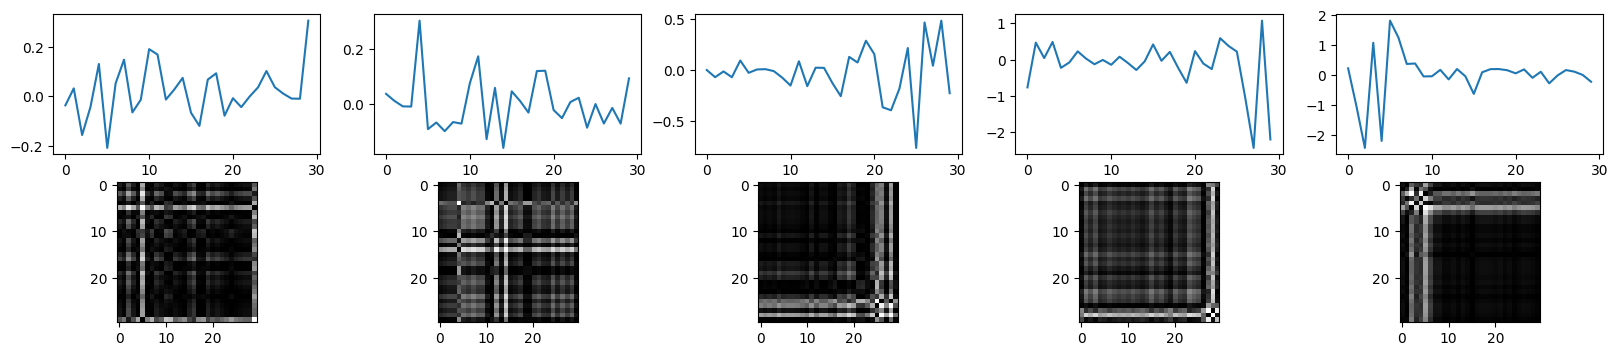

In [230]:
# display several time series and the corresponding images
fig, ax = plt.subplots(2, 5, figsize=(20, 4))
for i in range(0, 125, 25):
    ax[0, int(i / 25)].plot(X_train[i])
for i in range(0, 125, 25):
    ax[1, int(i / 25)].imshow(X_data[i], "gray")

In [231]:
# Split into train and test
train_split = 0.8
y_data_train = y_data[: int(train_split * y_data.shape[0])]
y_data_test = y_data[int(train_split * y_data.shape[0]) :]
X_data_train = X_data[: int(train_split * y_data.shape[0])]
X_data_test = X_data[int(train_split * y_data.shape[0]) :]

In [232]:
model = tf.keras.Sequential()
# Input layer
model.add(tf.keras.layers.InputLayer(input_shape=(30, 30, 1)))


model.add(tf.keras.layers.Conv2D(16, 3, activation="relu", padding="same"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same"))
model.add(tf.keras.layers.MaxPooling2D(2))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5, seed=1234))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 15, 15, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │         590,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 615,169 (2.35 MB)

 Trainable params: 615,169 (2.35 MB)

 Non-trainable params: 0 (0.00 B)

In [233]:
model.compile(loss="binary_crossentropy", optimizer="RMSprop", metrics=["accuracy"])
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "model.keras", monitor="val_accuracy", save_best_only=True, mode="auto"
)
class_weight = {0: 1 / (1 - np.mean(y_data_train)), 1: 1.0}
print(class_weight)


{0: 2.007407407407407, 1: 1.0}


In [234]:
model.fit(
    x=X_data_train,
    y=y_data_train,
    epochs=50,
    validation_data=(X_data_test, y_data_test),
    verbose=1,
    callbacks=[checkpoint],
    class_weight=class_weight,
)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.5225 - loss: 25.6903 - val_accuracy: 0.4608 - val_loss: 0.8640
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4459 - loss: 1.3974 - val_accuracy: 0.5147 - val_loss: 0.7000
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5198 - loss: 1.0470 - val_accuracy: 0.4853 - val_loss: 0.7293
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4950 - loss: 1.0400 - val_accuracy: 0.5000 - val_loss: 0.6959
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5391 - loss: 1.0171 - val_accuracy: 0.5000 - val_loss: 0.7237
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5415 - loss: 1.1030 - val_accuracy: 0.4510 - val_loss: 0.7857
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5418 - loss: 0.9752 - val_accuracy: 0.5245 - val_loss: 0.8027
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5754 - loss: 0.9550 - val_accuracy: 0.4951 - val_los

In [235]:
model = tf.keras.models.load_model("model.keras")
acc = model.evaluate(x=X_data_test, y=y_data_test)
print("Accuracy over validation: {:.2f}%".format(acc[1] * 100))


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5275 - loss: 0.7923
Accuracy over validation: 52.45%


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
              precision    recall  f1-score   support

       False       0.51      0.71      0.60       101
        True       0.55      0.34      0.42       103

    accuracy                           0.52       204
   macro avg       0.53      0.53      0.51       204
weighted avg       0.53      0.52      0.51       204



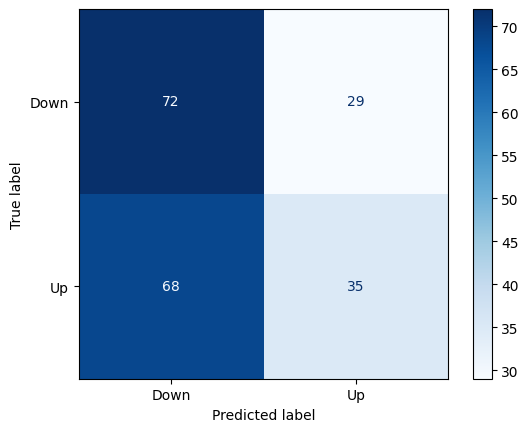

In [236]:
from sklearn import metrics
from sklearn.metrics import classification_report

y_prob = model.predict(X_data_test)
y_pred = np.round(y_prob)
cm = metrics.confusion_matrix(y_data_test, y_pred)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Down", "Up"])
cm.plot(values_format="", cmap="Blues")
print(classification_report(y_data_test, y_pred))

## Step 3.c.

For this section we will again use the same fractionally time series data that we have obtained in Step 1.c. but this time we will use GAF representation of the time series data and build and train a CNN model on top of it and try to predict the time series.

In [237]:
df_fd['Fractional_Diff']

,Fractional_Diff
Date,
2017-01-02 00:00:00+00:00,NaN
2017-01-03 00:00:00+00:00,NaN
2017-01-04 00:00:00+00:00,NaN
2017-01-05 00:00:00+00:00,NaN
2017-01-06 00:00:00+00:00,NaN
...,...
2024-10-24 00:00:00+00:00,501.951551
2024-10-25 00:00:00+00:00,472.752291
2024-10-28 00:00:00+00:00,487.492490


In [238]:
# Obtaining the same fractionally differenced data from step 1.c.
Xdf_fd_prices = df_fd['Fractional_Diff']

In [239]:
Xdf_fd_prices

,Fractional_Diff
Date,
2017-01-02 00:00:00+00:00,NaN
2017-01-03 00:00:00+00:00,NaN
2017-01-04 00:00:00+00:00,NaN
2017-01-05 00:00:00+00:00,NaN
2017-01-06 00:00:00+00:00,NaN
...,...
2024-10-24 00:00:00+00:00,501.951551
2024-10-25 00:00:00+00:00,472.752291
2024-10-28 00:00:00+00:00,487.492490


(1554,)


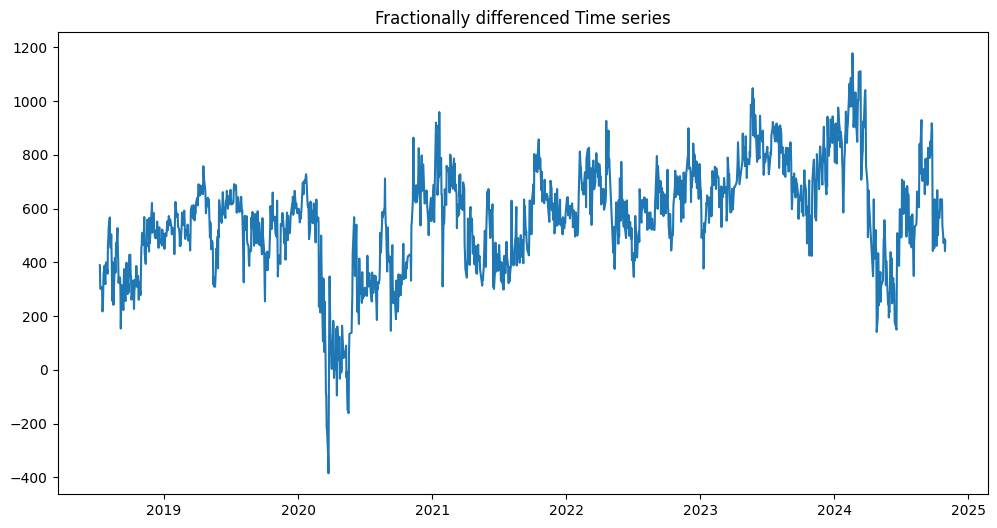

In [240]:
# Difference the log-transformed series to make it stationary (log returns)
Xdf_fd_prices = Xdf_fd_prices.dropna()

# Print the shape of the transformed data
print(Xdf_fd_prices.shape)

# Plot the log-differenced (stationary) time series
plt.figure(figsize=(12, 6))
plt.plot(Xdf_fd_prices)
plt.title('Fractionally differenced Time series')
plt.show()


We will now build a matric by stacking time series of 30 observations, in the image below how matrix represents information about 1894 time series of 30 obervations on overlapping intervals.

(1524, 30)


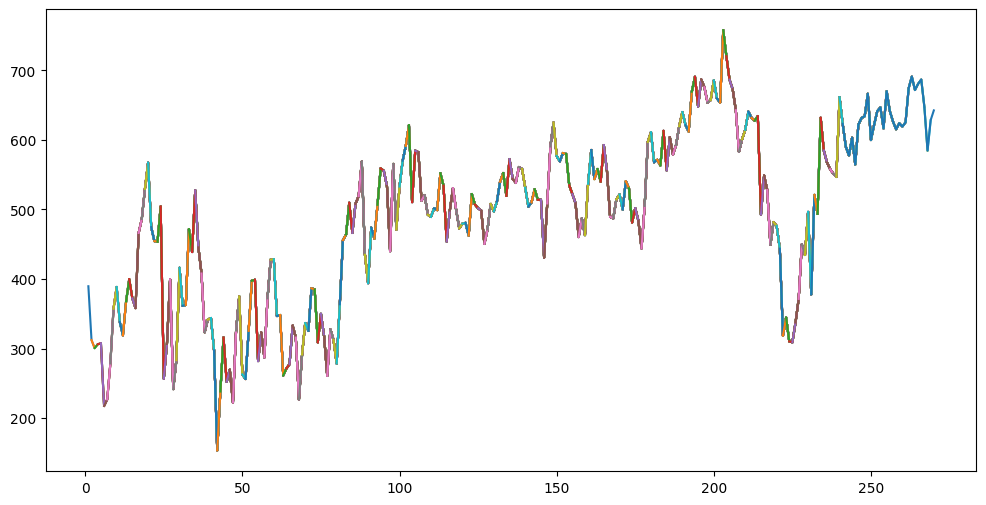

In [241]:
X_train = []
window_size = 30
for i in range(window_size, Xdf_fd_prices.shape[0]):
    X_train.append(Xdf_fd_prices[i - window_size : i])
X_train = np.array(X_train)
print(X_train.shape)
# Define a "window_size"-days interval
days = np.linspace(1, X_train.shape[0], num=X_train.shape[0])
# Plot the overlapping time series
plt.figure(figsize=(12, 6))
for i in range(241):
    plt.plot(days[i : window_size + i], X_train[i, :])

Now we will apply the GAF Tranformation and we will see some illustratration of some observations.
we have a sample of 1894 images, to which we can attach a label whether the price went up or down over the following days, and train a Convolutional Neural Network.

In [242]:
from pyts.image import GramianAngularField

#X_train_mean = np.nanmean(X_train)
#X_train = np.nan_to_num(X_train, nan=X_train_mean)

transformer = GramianAngularField()
X_train_new = transformer.transform(X_train)
print(X_train_new.shape)


(1524, 30, 30)


(30, 30)


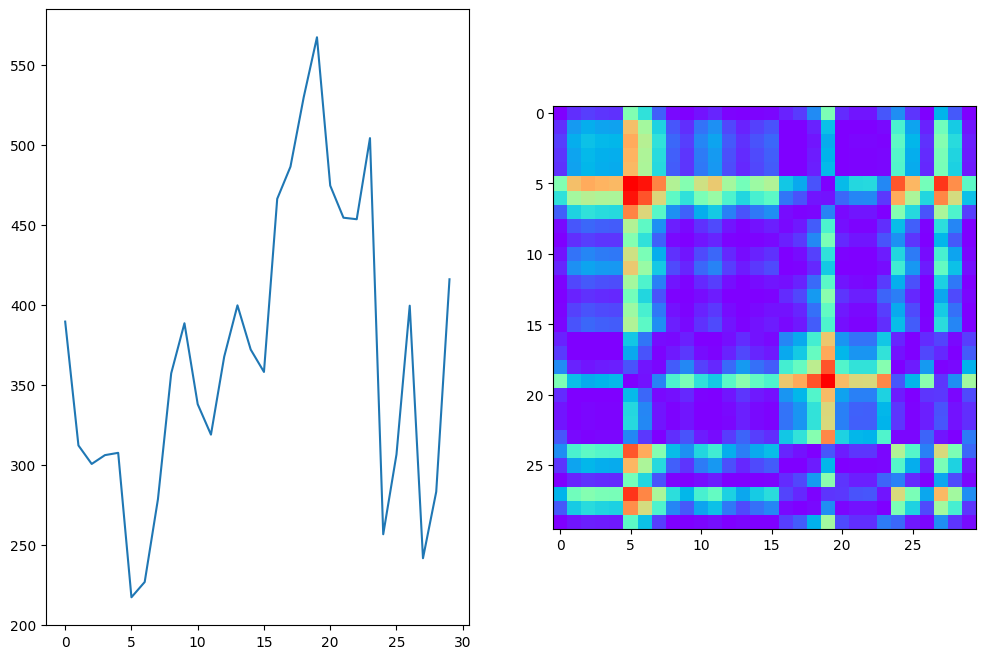

In [243]:
# Show the results for the first time series
fig, ax = plt.subplots(1, 2, figsize=(12, 8), gridspec_kw={"width_ratios": [1, 1]})
ax[0].plot(X_train[0, :])
ax[1].imshow(X_train_new[0], cmap="rainbow")
print(X_train_new[0].shape)


(30, 30)


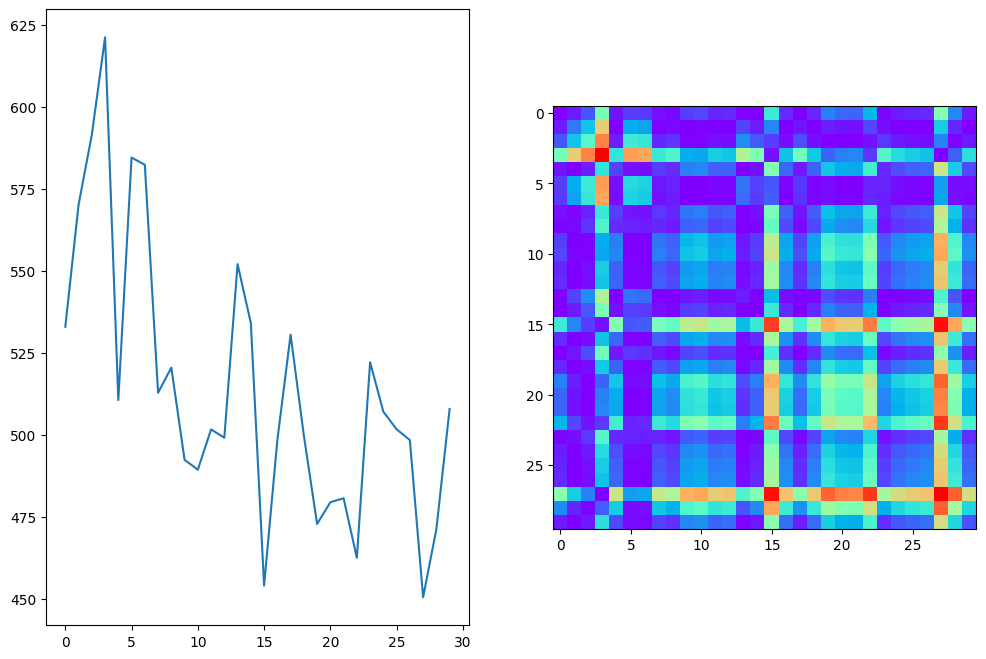

In [244]:
# Show the results for the 100th time series
fig, ax = plt.subplots(1, 2, figsize=(12, 8), gridspec_kw={"width_ratios": [1, 1]})
ax[0].plot(X_train[99, :])
ax[1].imshow(X_train_new[99], cmap="rainbow")
print(X_train_new[99].shape)

Now we will design a CNN to predecit the time series and how it is evolving.

In [245]:
import tensorflow as tf

In [246]:
# Generate the labels: 1 if price goes up after window_size days, 0 otherwise
y_data = []
for i in range(window_size, Xdf_fd_prices.shape[0] - window_size):
    y_data.append(Xdf_fd_prices[i] < Xdf_fd_prices[i + window_size])
y_data = np.array(y_data)
y_data.shape



<ipython-input-246-b786ad130328>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_data.append(Xdf_fd_prices[i] < Xdf_fd_prices[i + window_size])


(1494,)

In [247]:
# Determine the examples to be used as inputs in the model and rescale them to the [0,255] scale
X_data = X_train_new[:-window_size]
for i in range(X_data.shape[0]):
    X_data[i] = (X_data[i] - np.min(X_data[i])) / (
        np.max(X_data[i]) - np.min(X_data[i])
    )
# We could simply write X_data = (X_data + 1)/2
X_data = X_data * 255
X_data.shape

(1494, 30, 30)

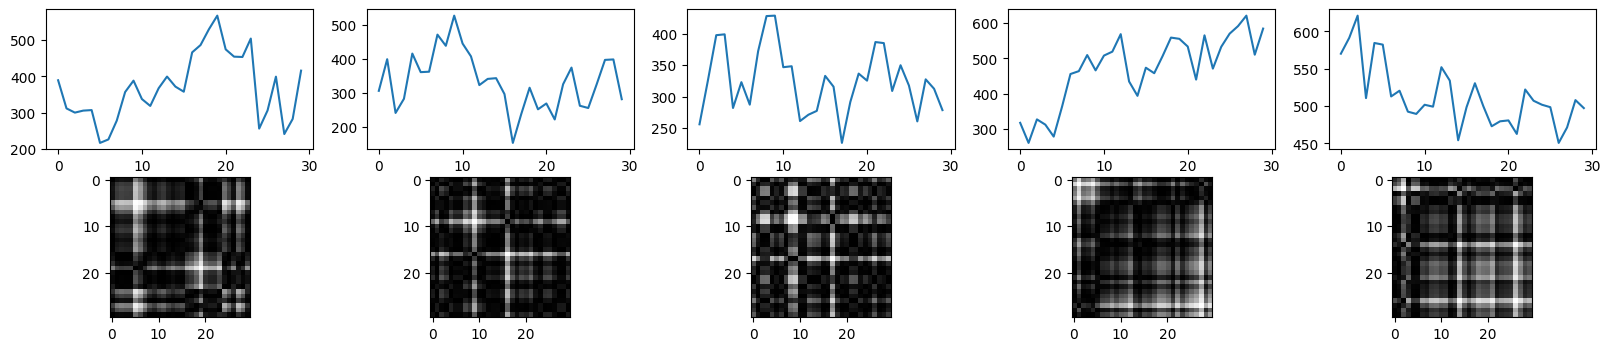

In [248]:
# display several time series and the corresponding images
fig, ax = plt.subplots(2, 5, figsize=(20, 4))
for i in range(0, 125, 25):
    ax[0, int(i / 25)].plot(X_train[i])
for i in range(0, 125, 25):
    ax[1, int(i / 25)].imshow(X_data[i], "gray")

Here will split the data into train and test dataset.

In [249]:
# Split into train and test
train_split = 0.8
y_data_train = y_data[: int(train_split * y_data.shape[0])]
y_data_test = y_data[int(train_split * y_data.shape[0]) :]
X_data_train = X_data[: int(train_split * y_data.shape[0])]
X_data_test = X_data[int(train_split * y_data.shape[0]) :]

Now we will define the structure of our CNN model, For input layer we have a input shpae of (30,30,1), i.e our grayscale images of 30 X 30 pixels. Now let's discuss convolution layers, Our First Convolution layer have 16 filters each of 3x3 with relu activation, witha max pooling layer of size 2x2. The second convolution layer have 32 filters of size 3x3 with relu activation function and second pooling layer of pooling size 2x2. the we have Third Conv layer with 64 filters of size 3x3 with relu activation function and second pooling layer of pooling size 2x2. after that we have a flatten layer which Flattens the 2D output from the convolutional layers into a 1D vector. Then we have dense layers in which we have first dense layer of 1024 units with relu activation function and a dropout layer with dropout rate of 0.5 to prevent overfitting and at last we have Output layer of 1 unit with a sigmoid activation function, suitable for binary classification tasks.

In [250]:
model = tf.keras.Sequential()
# Input layer
model.add(tf.keras.layers.InputLayer(input_shape=(30, 30, 1)))


model.add(tf.keras.layers.Conv2D(16, 3, activation="relu", padding="same"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same"))
model.add(tf.keras.layers.MaxPooling2D(2))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5, seed=1234))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │         590,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 615,169 (2.35 MB)

 Trainable params: 615,169 (2.35 MB)

 Non-trainable params: 0 (0.00 B)

In [251]:
model.compile(loss="binary_crossentropy", optimizer="RMSprop", metrics=["accuracy"])
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "model.keras", monitor="val_accuracy", save_best_only=True, mode="auto"
)
class_weight = {0: 1 / (1 - np.mean(y_data_train)), 1: 1.0}
print(class_weight)


{0: 2.2892720306513406, 1: 1.0}


we will fit our model to the data to find the predection results.

In [252]:
model.fit(
    x=X_data_train,
    y=y_data_train,
    epochs=50,
    validation_data=(X_data_test, y_data_test),
    verbose=1,
    callbacks=[checkpoint],
    class_weight=class_weight,
)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.4918 - loss: 18.2700 - val_accuracy: 0.4548 - val_loss: 0.8575
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5068 - loss: 1.1129 - val_accuracy: 0.4649 - val_loss: 1.9877
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5057 - loss: 1.2688 - val_accuracy: 0.4615 - val_loss: 1.0190
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4949 - loss: 1.0718 - val_accuracy: 0.4983 - val_loss: 0.9200
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5520 - loss: 1.0489 - val_accuracy: 0.4816 - val_loss: 0.8794
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5948 - loss: 1.0056 - val_accuracy: 0.5385 - val_loss: 0.8066
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5846 - loss: 0.9798 - val_accuracy: 0.4883 - val_loss: 1.0660
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6956 - loss: 0.8200 - val_accuracy: 0.5385 - val_

In [253]:
model = tf.keras.models.load_model("model.keras")
acc = model.evaluate(x=X_data_test, y=y_data_test)
print("Accuracy over validation: {:.2f}%".format(acc[1] * 100))


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5155 - loss: 0.8219
Accuracy over validation: 53.85%


We have found a accuracy of 56% on our model which is not very impressive, we can also verify it in our Confusion matrix plotted below.

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

       False       0.50      0.60      0.55       139
        True       0.58      0.48      0.53       160

    accuracy                           0.54       299
   macro avg       0.54      0.54      0.54       299
weighted avg       0.55      0.54      0.54       299



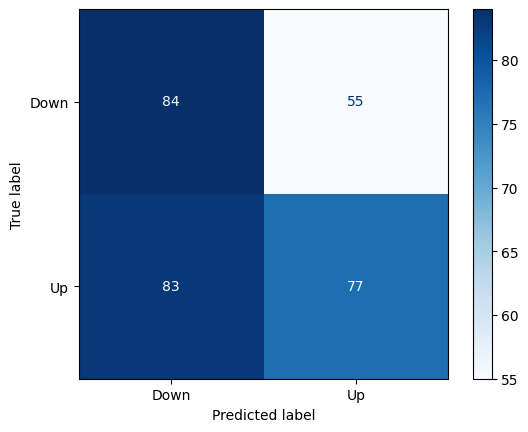

In [254]:
from sklearn import metrics
from sklearn.metrics import classification_report

y_prob = model.predict(X_data_test)
y_pred = np.round(y_prob)
cm = metrics.confusion_matrix(y_data_test, y_pred)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Down", "Up"])
cm.plot(values_format="", cmap="Blues")
print(classification_report(y_data_test, y_pred))

In [ ]:
%%shell jupyter nbconvert --to html /content/Group_4801_Group_Work_Project_2.ipyn